# <center>**PILOTO**</center>
## <center> Tiendas Propias y Franquicias </center>

Para el pronóstico de unidades para estos canales, se implementan los siguientes modelos:
<ul>
    <li>HOLT WINTERS</li>
    <li>ARIMA</li>
    <li>SARIMA</li>
    <li>XGBOOST</li>
    <li>PROPHET</li>
</ul>

De los cuales, el mejor desempeño lo presenta el modelo HOLT WINTERS.
El modelo es implementado 2 veces: la primera para pronosticar los meses de pandemia que corresponden al periodo de marzo-septiembre del 2020. La segunda implementación del modelo, se hace con los datos obtenidos del primer pronóstico.

### Liberías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import date, time, datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from hdbcli import dbapi as db

In [2]:
from statsmodels.tsa.api import STLForecast, ExponentialSmoothing, ExponentialSmoothing

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score

from statsmodels.tsa.api import STLForecast, ExponentialSmoothing, ETSModel

import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

from pmdarima.arima import auto_arima
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

In [3]:
import pandas as pd
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from openpyxl import Workbook

import pandas as pd
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from openpyxl import Workbook

### Base de datos

In [4]:
conn = db.connect(address='10.0.0.110', port='30015', user='DESARROLLO', password='DevHermeco.2022')
cursor = conn.cursor()
sql ='''SELECT "AÑO",
"REGIÓN",
"CANAL",
"SOLICITANTE", 
"MES",
"SEMANA",
"MATERIAL",
"AFS: COLOR",
"AFS: TALLA", 
"UNIDADES", 
"VALOR VENTA POS", 
"Tipo de Negocio", 
"Destino", 
"Año de Venta", 
"Mes de Venta", 
"Sublínea",
"Mundo",
"Grupo de Artículo", 
"Tipo de Artículo", 
"Tipo de Tejido", 
"Tipo de Referencia", 
"Saldo", 
"Clase", 
"Concepto Diseño",
"FECHA VENTA",
"Organización Ventas"
        FROM HEP300.VW_CD_REPORTE_VENTAS_ALL_2016 \
        WHERE(CANAL = 'FRANQUICIAS' OR CANAL = 'TIENDAS PROPIAS')
        AND "AÑO" = 2023
'''
df_canal = pd.read_sql_query(sql, conn)


In [7]:
root = "C:/Users/HELENAMM/OneDrive - offcorss.com/Escritorio/Helena Muñoz/Pronósticos/Modelos fase 2/Data/"
list_2018_2022 = [pd.read_excel(root + "VENTAS_2018_1.xlsx"),
                  pd.read_excel(root + "VENTAS_2018_2.xlsx"),
                  pd.read_excel(root + "VENTAS_2018_3.xlsx"),

                  pd.read_excel(root + "VENTAS_2019_1.xlsx"),
                  pd.read_excel(root + "VENTAS_2019_2.xlsx"),
                  pd.read_excel(root + "VENTAS_2019_3.xlsx"),

                  pd.read_excel(root + "VENTAS_2020_1.xlsx"),
                  pd.read_excel(root + "VENTAS_2020_2.xlsx"),
                  pd.read_excel(root + "VENTAS_2020_3.xlsx"),
                  
                  pd.read_excel(root + "VENTAS_2021_1.xlsx"),
                  pd.read_excel(root + "VENTAS_2021_2.xlsx"),
                  pd.read_excel(root + "VENTAS_2021_3.xlsx"),

                  pd.read_excel(root + "VENTAS_2022_1.xlsx"),
                  pd.read_excel(root + "VENTAS_2022_2.xlsx"),
                  pd.read_excel(root + "VENTAS_2022_3.xlsx"),
        
             ]
df_canal2 = pd.concat(list_2018_2022)

In [8]:
df_canal =  pd.concat([df_canal,df_canal2],ignore_index=True)

In [9]:
# df_canal.loc[(df_canal['AÑO'] == 2018) & (df_canal['MES'] <= 6)].to_excel('VENTAS_2018_1.xlsx')
# df_canal.loc[(df_canal['AÑO'] == 2018) & (df_canal['MES'] > 6) & (df_canal['MES']  <= 9)].to_excel('VENTAS_2018_2.xlsx')
# df_canal.loc[(df_canal['AÑO'] == 2018) & (df_canal['MES'] > 9)].to_excel('VENTAS_2018_3.xlsx')

In [10]:
# df_canal.loc[(df_canal['AÑO'] == 2019) & (df_canal['MES'] <= 6)].to_excel('VENTAS_2019_1.xlsx')
# df_canal.loc[(df_canal['AÑO'] == 2019) & (df_canal['MES'] > 6) & (df_canal['MES']  <= 9)].to_excel('VENTAS_2019_2.xlsx')
# df_canal.loc[(df_canal['AÑO'] == 2019) & (df_canal['MES'] > 9)].to_excel('VENTAS_2019_3.xlsx')

In [11]:
# df_canal.loc[(df_canal['AÑO'] == 2020) & (df_canal['MES'] <= 6)].to_excel('VENTAS_2020_1.xlsx')
# df_canal.loc[(df_canal['AÑO'] == 2020) & (df_canal['MES'] > 6) & (df_canal['MES']  <= 9)].to_excel('VENTAS_2020_2.xlsx')
# df_canal.loc[(df_canal['AÑO'] == 2020) & (df_canal['MES'] > 9)].to_excel('VENTAS_2020_3.xlsx')

In [12]:
# df_canal.loc[(df_canal['AÑO'] == 2021) & (df_canal['MES'] <= 6)].to_excel('VENTAS_2021_1.xlsx')
# df_canal.loc[(df_canal['AÑO'] == 2021) & (df_canal['MES'] > 6) & (df_canal['MES']  <= 9)].to_excel('VENTAS_2021_2.xlsx')
# df_canal.loc[(df_canal['AÑO'] == 2021) & (df_canal['MES'] > 9)].to_excel('VENTAS_2021_3.xlsx')

In [13]:
# df_canal.loc[(df_canal['AÑO'] == 2022) & (df_canal['MES'] <= 6)].to_excel('VENTAS_2022_1.xlsx')
# df_canal.loc[(df_canal['AÑO'] == 2022) & (df_canal['MES'] > 6) & (df_canal['MES']  <= 9)].to_excel('VENTAS_2022_2.xlsx')
# df_canal.loc[(df_canal['AÑO'] == 2022) & (df_canal['MES'] > 9)].to_excel('VENTAS_2022_3.xlsx')

In [14]:
df_canal.isna().sum()

AÑO                          0
REGIÓN                       0
CANAL                        0
SOLICITANTE            8924464
MES                          0
SEMANA                       0
MATERIAL                     0
AFS: COLOR                   0
AFS: TALLA                   0
UNIDADES                     0
VALOR VENTA POS              0
Tipo de Negocio             39
Destino                    790
Año de Venta                 0
Mes de Venta                 0
Sublínea                  2059
Mundo                        0
Grupo de Artículo          207
Tipo de Artículo          2316
Tipo de Tejido           60284
Tipo de Referencia       60284
Saldo                        0
Clase                    70042
Concepto Diseño           2095
FECHA VENTA                  0
Organización Ventas          0
Unnamed: 0              220198
dtype: int64

In [15]:
df_canal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144662 entries, 0 to 9144661
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   AÑO                  int64  
 1   REGIÓN               object 
 2   CANAL                object 
 3   SOLICITANTE          object 
 4   MES                  int64  
 5   SEMANA               int64  
 6   MATERIAL             object 
 7   AFS: COLOR           object 
 8   AFS: TALLA           object 
 9   UNIDADES             float64
 10  VALOR VENTA POS      float64
 11  Tipo de Negocio      object 
 12  Destino              object 
 13  Año de Venta         object 
 14  Mes de Venta         object 
 15  Sublínea             object 
 16  Mundo                object 
 17  Grupo de Artículo    object 
 18  Tipo de Artículo     object 
 19  Tipo de Tejido       object 
 20  Tipo de Referencia   object 
 21  Saldo                object 
 22  Clase                object 
 23  Concepto Diseño      object 
 24

In [16]:
df = df_canal.loc[(df_canal['Concepto Diseño'] == 'SPECIAL OCCASIONS')]
# df = df.assign(Fecha = pd.to_datetime(df_canal['FECHA VENTA'], format='%Y-%m-%d'))

In [17]:
df.assign(Fecha = pd.to_datetime(df_canal['FECHA VENTA'], format='%Y-%m-%d'))

,AÑO,REGIÓN,CANAL,SOLICITANTE,MES,SEMANA,MATERIAL,AFS: COLOR,AFS: TALLA,UNIDADES,...,Tipo de Artículo,Tipo de Tejido,Tipo de Referencia,Saldo,Clase,Concepto Diseño,FECHA VENTA,Organización Ventas,Unnamed: 0,Fecha
5696,2023,QUINDIO,FRANQUICIAS,,1,2,4153035,Rojo 19-1531,S,1.0,...,BUZO,TEJIDO PUNTO,PRENDA EXTERIOR,NO SALDO,DESARROLLO EXTERNO,SPECIAL OCCASIONS,2023-01-02,MAREDU S.A.S.,NaN,2023-01-02
5697,2023,BOYACA,FRANQUICIAS,,1,2,4153035,Rojo 19-1531,S,1.0,...,BUZO,TEJIDO PUNTO,PRENDA EXTERIOR,NO SALDO,DESARROLLO EXTERNO,SPECIAL OCCASIONS,2023-01-02,ANDINA KIDS S.A.S.,NaN,2023-01-02
5698,2023,RISARALDA,FRANQUICIAS,,1,2,4153035,Rojo 19-1531,S,1.0,...,BUZO,TEJIDO PUNTO,PRENDA EXTERIOR,NO SALDO,DESARROLLO EXTERNO,SPECIAL OCCASIONS,2023-01-03,MAREDU S.A.S.,NaN,2023-01-03
5699,2023,HUILA,FRANQUICIAS,,1,2,4153035,Rojo 19-1531,S,1.0,...,BUZO,TEJIDO PUNTO,PRENDA EXTERIOR,NO SALDO,DESARROLLO EXTERNO,SPECIAL OCCASIONS,2023-01-06,DIST. MULTITOYS SAS,NaN,2023-01-06
5700,2023,VALLE,TIENDAS PROPIAS,,1,3,4153035,Rojo 19-1531,S,1.0,...,BUZO,TEJIDO PUNTO,PRENDA EXTERIOR,NO SALDO,DESARROLLO EXTERNO,SPECIAL OCCASIONS,2023-01-09,Org.ventas Nacional,NaN,2023-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9122484,2022,VALLE,FRANQUICIAS,NaN,12,53,4114330,Gris 15-0000,XS,1.0,...,CARGADERA,NO TEJIDO,PRENDA EXTERIOR,ES SALDO,MAQUILA,SPECIAL OCCASIONS,2022-12-26 00:00:00,MAREDU S.A.S.,12472774.0,2022-12-26
9122485,2022,VALLE,FRANQUICIAS,NaN,12,53,4114330,Gris 15-0000,XS,1.0,...,CARGADERA,NO TEJIDO,PRENDA EXTERIOR,ES SALDO,MAQUILA,SPECIAL OCCASIONS,2022-12-26 00:00:00,MAREDU S.A.S.,12472775.0,2022-12-26
9122486,2022,ATLÁNTICO,FRANQUICIAS,NaN,12,53,4114330,Gris 15-0000,XS,1.0,...,CARGADERA,NO TEJIDO,PRENDA EXTERIOR,ES SALDO,MAQUILA,SPECIAL OCCASIONS,2022-12-29 00:00:00,TEXVIGAR S.A.S.,12472776.0,2022-12-29
9122487,2022,RISARALDA,FRANQUICIAS,NaN,10,44,4104693,Gris 15-0000,5T,1.0,...,CAMISA MANGA LARGA,TEJIDO PLANO,PRENDA EXTERIOR,ES SALDO,MAQUILA,SPECIAL OCCASIONS,2022-10-27 00:00:00,MAREDU S.A.S.,12475337.0,2022-10-27


In [18]:
df.head()

,AÑO,REGIÓN,CANAL,SOLICITANTE,MES,SEMANA,MATERIAL,AFS: COLOR,AFS: TALLA,UNIDADES,...,Grupo de Artículo,Tipo de Artículo,Tipo de Tejido,Tipo de Referencia,Saldo,Clase,Concepto Diseño,FECHA VENTA,Organización Ventas,Unnamed: 0
5696,2023,QUINDIO,FRANQUICIAS,,1,2,4153035,Rojo 19-1531,S,1.0,...,BUZO O CHAQUETA,BUZO,TEJIDO PUNTO,PRENDA EXTERIOR,NO SALDO,DESARROLLO EXTERNO,SPECIAL OCCASIONS,2023-01-02,MAREDU S.A.S.,NaN
5697,2023,BOYACA,FRANQUICIAS,,1,2,4153035,Rojo 19-1531,S,1.0,...,BUZO O CHAQUETA,BUZO,TEJIDO PUNTO,PRENDA EXTERIOR,NO SALDO,DESARROLLO EXTERNO,SPECIAL OCCASIONS,2023-01-02,ANDINA KIDS S.A.S.,NaN
5698,2023,RISARALDA,FRANQUICIAS,,1,2,4153035,Rojo 19-1531,S,1.0,...,BUZO O CHAQUETA,BUZO,TEJIDO PUNTO,PRENDA EXTERIOR,NO SALDO,DESARROLLO EXTERNO,SPECIAL OCCASIONS,2023-01-03,MAREDU S.A.S.,NaN
5699,2023,HUILA,FRANQUICIAS,,1,2,4153035,Rojo 19-1531,S,1.0,...,BUZO O CHAQUETA,BUZO,TEJIDO PUNTO,PRENDA EXTERIOR,NO SALDO,DESARROLLO EXTERNO,SPECIAL OCCASIONS,2023-01-06,DIST. MULTITOYS SAS,NaN
5700,2023,VALLE,TIENDAS PROPIAS,,1,3,4153035,Rojo 19-1531,S,1.0,...,BUZO O CHAQUETA,BUZO,TEJIDO PUNTO,PRENDA EXTERIOR,NO SALDO,DESARROLLO EXTERNO,SPECIAL OCCASIONS,2023-01-09,Org.ventas Nacional,NaN


In [19]:
# Modificar el año de venta STR --> INT
df['Año de Venta'] = df['Año de Venta'].astype(int)

In [20]:
sorted(df['Tipo de Artículo'].unique())

['ARETAS',
 'BALACA',
 'BALETA',
 'BAMBA',
 'BERMUDA',
 'BODY CAMISA ML',
 'BODY MANGA CORTA',
 'BODY MANGA LARGA',
 'BODY MANGA SISA',
 'BOLSO',
 'BOTAS',
 'BUZO',
 'CAMISA MANGA CORTA',
 'CAMISA MANGA LARGA',
 'CAMISA MANGA SISA',
 'CAMISETA MANGA LARGA',
 'CARGADERA',
 'CAÑA CORTA',
 'CAÑA LARGA',
 'CHALECO',
 'CHAQUETA',
 'CLASICA',
 'COLLAR',
 'CONJUNTO CORTO',
 'CONJUNTO LARGO',
 'CORBATA',
 'CORREA',
 'DIADEMA',
 'ENTERIZO LARGO',
 'GABAN',
 'HEBILLAS',
 'MEDIA ANTALON',
 'MIDI',
 'MINIFALDA',
 'OTROS',
 'OVERALL LARGO',
 'PANTALON',
 'PANTY CLASICO',
 'PUÑO DOBLADO',
 'SANDALIA',
 'SET',
 'SHORT',
 'SWEATER',
 'TENIS',
 'TOBILLERA',
 'VESTIDO MANGA CORTA',
 'VESTIDO MANGA LARGA',
 'VESTIDO MANGA SISA',
 'ZAPATO',
 'ZAPATOS COSIDOS',
 'ZAPATOS PRECAMINADOR']

En el caso de SPECIAL OCCASIONS, se debe tener en cuenta las variables:
* **Mes de Venta**: mes en el cual se lanzó el portafolio.
* **Año de Venta**: año en el cual se lanzó el portafolio.

<br> Por otra parte, se verifica que al filtrar los datos según el ***CONCEPTO DE DISEÑO*** la sublínea corresponda a ***SPECIAL*** y viceversa.

Dentro del dataframe, se encuentran portafolios lanzados en años previos al 2016, por lo tanto, dichos datos deben ser eliminados para el análisis.

<br>**MODELO**: <br>
Por otra parte, para el modelo, donde se busca pronosticar las ventas para el portafolio OCTUBRE 2023, el cual estará vigente hasta marzo de 2024.

### Filtro periodo de interés (2016-2023) & (SEPT, OCT, NOV)

In [21]:
df = df.loc[df['Año de Venta'] >= 2016]
df['Año de Venta'].unique()

array([2022, 2023, 2021, 2018, 2016, 2017, 2019, 2020])

In [22]:
# Filtro por meses de lanzamiento
# mes_interes = ['SEPTIEMBRE','OCTUBRE','NOVIEMBRE']
# df = df.loc[(df['Mes de Venta'].isin(mes_interes))]
df['Mes de Venta'].unique()

array(['NOVIEMBRE', 'SEPTIEMBRE', 'MARZO', 'ABRIL', 'OCTUBRE', 'MAYO',
       'JULIO', 'AGOSTO', 'DICIEMBRE'], dtype=object)

### FUNCIONES

In [23]:
test_df = pd.DataFrame({
    # 'Año de Venta': [2023,2023,2023,2023,2023,2023],
                        #   'Mes de Venta': ['OCTUBRE','OCTUBRE','OCTUBRE','OCTUBRE','OCTUBRE','OCTUBRE'],
                          'MES': [10,11,12,1,2,3],
                          'AÑO': [2023,2023,2023,2024,2024,2024],
                          'UNIDADES': [0,0,0,0,0,0]
})
test_df

,MES,AÑO,UNIDADES
0,10,2023,0
1,11,2023,0
2,12,2023,0
3,1,2024,0
4,2,2024,0
5,3,2024,0


In [24]:
def DATA_preparation(mundo,tipo):
        # Esta funcion recibe 2 parametros, MUNDO Y TIPO DE ARTICULO
        # sobre el cual se desea hacer el pronostico.

        # la funcion retorna un dataframe con los elementos de entrada
        # contiene las columnas AÑO DE VENTA,
        #                       MES DE VENTA
        #                       MES
        #                       AÑO
        #                       UNIDADES
        data = df.loc[df["Mundo"] == mundo]
        data = data.loc[data["Tipo de Artículo"] == tipo]

        # data_df = data.groupby(['Año de Venta', 'Mes de Venta', 'MES', 'AÑO'])[
        # 'UNIDADES'].sum().to_frame().sort_values(by=['AÑO', 'MES']).reset_index()

        data_df = data.groupby(['MES', 'AÑO'])[
        'UNIDADES'].sum().to_frame().sort_values(by=['AÑO', 'MES']).reset_index()

        # filtrar los meses de interes OCT-MAR
        data_df = data_df.loc[(data_df['MES'] >= 10) | (data_df['MES'] <= 3)]

        # AGREGAR COLUMNAS PRONOSTICO
        # TOMANDO LOS PRIMEROS 5 DATOS Y REEMPLAZANDO PARA EL FUTURO
        df_model = pd.concat([data_df,
        test_df], axis=0, ignore_index=True)


        # CREAR COLUMNA AÑO Y MES SEGUN MES Y AÑO DE VENTA
        df_model['MES_AÑO'] = pd.to_datetime(df_model['AÑO'].astype(str) + '-' + df_model['MES'].astype(str)).dt.strftime('%Y-%m')

        # df_model2 = df_model.groupby('Año de Venta', 'Mes de Venta', 'MES', 'AÑO','MES_AÑO')[['UNIDADES']].sum().to_frame().reset_index()

        return df_model

#### HOLT WINTERS

In [25]:
def HOLT_WINTERS_model_ds(df):
    # HOLT WINTERS - DS
    df_model2 = df[['MES_AÑO', 'UNIDADES']]

    y_train = df_model2.loc[pd.to_datetime(df_model2['MES_AÑO']) <= '2020-02'].set_index('MES_AÑO')
    y_test = df_model2.loc[(pd.to_datetime(df_model2['MES_AÑO']) >= '2020-03') & 
                            (pd.to_datetime(df_model2['MES_AÑO']) <= '2020-12')].set_index('MES_AÑO')

    config = {"seasonal_periods":5,
                        #"trend":"add",
                        "seasonal":"add",
                        #"damped_trend":True,
                        #"use_boxcox":True,
                        #"initialization_method":"estimated"
                        "initialization_method":"estimated"}

    stlf_es_5_sintetico = STLForecast(y_train, 
                                ExponentialSmoothing, 
                                model_kwargs = config,
                                period = 12, 
                                robust=True, seasonal_deg=0, trend_deg=0, low_pass_deg=0)

    stlf_res_es_5_sintetico = stlf_es_5_sintetico.fit()
    forecast_es_5_sintetico = stlf_res_es_5_sintetico.forecast(len(y_test))
    y_test['UNIDADES'] = np.ceil(forecast_es_5_sintetico.values)
    # y_test_5_sintetico = forecast_es_5_sintetico.values

    # POST COVID
    y_train2 = pd.concat([y_train,y_test,
                        df_model2.loc[(df_model2.MES_AÑO >'2020-12') & (df_model2.MES_AÑO < '2023-04')].set_index('MES_AÑO')])
    y_test2 = df_model2.loc[(df_model2.MES_AÑO >='2023-04')].set_index('MES_AÑO')

    config = {"seasonal_periods":12,
                        #"trend":"add",
                        "seasonal":"add",
                        #"damped_trend":True,
                        #"use_boxcox":True,
                        #"initialization_method":"estimated"
                        "initialization_method":"estimated"}

    stlf_es_5_sintetico = STLForecast(y_train2, 
                                ExponentialSmoothing, 
                                model_kwargs = config,
                                period = 12, 
                                robust=True, seasonal_deg=0, trend_deg=0, low_pass_deg=0)

    stlf_res_es_5_sintetico = stlf_es_5_sintetico.fit()
    forecast_es_5_sintetico = stlf_res_es_5_sintetico.forecast(len(y_test2))
    y_test2['UNIDADES'] = np.ceil(forecast_es_5_sintetico.values)

    df_hotl_winters_ds = pd.concat([y_train2, y_test2]).reset_index()

    return df_hotl_winters_ds

In [26]:
def HOLT_WINTERS_model(df):
    # HOLT WINTERS - DS
    df_model2 = df[['MES_AÑO', 'UNIDADES']]

    y_train = df_model2.loc[pd.to_datetime(df_model2['MES_AÑO']) <= '2023-03'].set_index('MES_AÑO')
    y_test = df_model2.loc[(pd.to_datetime(df_model2['MES_AÑO']) >= '2023-04') & 
                            (pd.to_datetime(df_model2['MES_AÑO']) <= '2024-5')].set_index('MES_AÑO')

    config = {"seasonal_periods":5,
                        #"trend":"add",
                        "seasonal":"add",
                        #"damped_trend":True,
                        #"use_boxcox":True,
                        #"initialization_method":"estimated"
                        "initialization_method":"estimated"}

    stlf_es_5_sintetico = STLForecast(y_train, 
                                ExponentialSmoothing, 
                                model_kwargs = config,
                                period = 12, 
                                robust=True, seasonal_deg=0, trend_deg=0, low_pass_deg=0)

    stlf_res_es_5_sintetico = stlf_es_5_sintetico.fit()
    forecast_es_5_sintetico = stlf_res_es_5_sintetico.forecast(len(y_test))
    y_test['UNIDADES'] = np.ceil(forecast_es_5_sintetico.values)
   
    df_hotl_winters_ds = pd.concat([y_train, y_test])

    return df_hotl_winters_ds

#### XGBOOST

In [27]:
def create_features(df, label=None):
    df['date'] = pd.to_datetime(df.index)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    df['covid'] = [1 if ((x > pd.Timestamp('2020-03')) & (x < pd.Timestamp('2021-03'))) else 0 for x in df.date]
    
    X = df[['quarter','month','year',
           'dayofyear','weekofyear','covid']]

    
    if label:
        y = df[label]
        return X, y
    return X

In [28]:
def XGB_model(df):
    df_model = df[['MES_AÑO', 'UNIDADES']]

    #  TRAIN & TEST
    train = df_model.loc[df_model.MES_AÑO <='2023-03'].set_index('MES_AÑO')
    test = df_model.loc[(df_model.MES_AÑO >='2023-04')].set_index('MES_AÑO')

    # Define el train y test de acuerdo con las bases de datos de train y de test
    X_train, y_train = create_features(train, label = 'UNIDADES')
    X_test, y_test = create_features(test, label = 'UNIDADES')

    xgbr = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=100,subsample=0.8)

    # Set the parameters by cross-validation
    tuned_parameters = {
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'base_score': [0.1, 0.3, 0.5],
        'eval_metric': ['rmse', 'mae', 'mape']
    }

    clf = GridSearchCV(xgbr, param_grid = tuned_parameters, cv = 5)
    clf.fit(X_train, y_train)

    # print("Best parameters set found on development set:")
    # print( clf.best_params_)
    # print("Best score found on development set:")
    # print( clf.best_score_)

    pred_test = clf.predict(X_test)
    test['UNIDADES'] = np.ceil(pred_test)

    df_xgb = pd.concat([train['UNIDADES'].to_frame(),
                   test['UNIDADES'].to_frame()]).reset_index()
    
    return df_xgb

In [29]:
def XGB_MODEL_SINTETIC(prueba5):

    df_model = prueba5[['MES_AÑO', 'UNIDADES']]
    
    # ANTES COVID
    train_before_covid = df_model.loc[df_model.MES_AÑO <'2020-01'].set_index('MES_AÑO')
    test_before_covid = df_model.loc[(df_model.MES_AÑO >='2020-01') & (df_model.MES_AÑO <='2020-12')].set_index('MES_AÑO')

    # Define el train y test de acuerdo con las bases de datos de train y de test
    X_train, y_train = create_features(train_before_covid, label = 'UNIDADES')
    X_test, y_test = create_features(test_before_covid, label = 'UNIDADES')

    xgbr = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=100,subsample=0.8)

    # Set the parameters by cross-validation
    tuned_parameters = {
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'base_score': [0.1, 0.3, 0.5],
        'eval_metric': ['rmse', 'mae', 'mape']
    }

    clf = GridSearchCV(xgbr, param_grid = tuned_parameters, cv = 5)
    clf.fit(X_train, y_train)

    pred_test = clf.predict(X_test)
    test_before_covid['UNIDADES'] = np.ceil(pred_test)

    # ---------------------------------------------------------------------
    # ---------------------------------------------------------------------

    # POST COVID
    train_after_covid = pd.concat([train_before_covid[['UNIDADES']],test_before_covid[['UNIDADES']],
                        df_model.loc[(df_model.MES_AÑO >'2020-12') & (df_model.MES_AÑO < '2023-04')].set_index('MES_AÑO')])
    test_after_covid = df_model.loc[(df_model.MES_AÑO >='2023-04')].set_index('MES_AÑO')

    # Define el train y test de acuerdo con las bases de datos de train y de test
    X_train, y_train = create_features(train_after_covid, label = 'UNIDADES')
    X_test, y_test = create_features(test_after_covid, label = 'UNIDADES')

    xgbr = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=100,subsample=0.8)

    # Set the parameters by cross-validation
    tuned_parameters = {
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'base_score': [0.1, 0.3, 0.5],
        'eval_metric': ['rmse', 'mae', 'mape']
    }

    clf = GridSearchCV(xgbr, param_grid = tuned_parameters, cv = 5)
    clf.fit(X_train, y_train)
    
    pred_test = clf.predict(X_test)
    test_after_covid['UNIDADES'] = np.ceil(pred_test)

    df_xgb_final = pd.concat([train_after_covid['UNIDADES'].to_frame(),
                    test_after_covid['UNIDADES'].to_frame()]).reset_index()
    
    return df_xgb_final

#### PROPHET

In [30]:
def PROPHET_model(df):
    dfProphet = df[['MES_AÑO', 'UNIDADES']].rename(columns={'MES_AÑO': 'ds', 'UNIDADES': 'y'})
   
   # COVID 2020
    dfProphet['covid'] = [1 if ((x > pd.Timestamp(
        '2020-03')) & (x < pd.Timestamp('2021-03'))) else 0 for x in pd.to_datetime(dfProphet['ds'])]

    dfProphet['floor'] = 0
    dfProphet['cap'] = dfProphet.y.max()

    train = dfProphet.loc[dfProphet['ds'] <= '2023-03']
    test = dfProphet.loc[dfProphet['ds'] > '2023-03']

    m = Prophet(growth='logistic')
    m.add_regressor('covid')
    m.fit(train)

    # make the forecast
    forecast = m.predict(test[['ds', 'covid', 'floor','cap']])
    forecast[['ds','yhat']]
    
    forecast['ds'] = pd.to_datetime(forecast['ds']).dt.strftime('%Y-%m')
    
    test = test.merge(forecast[['ds','yhat']], how='left',on='ds')[['ds','yhat']]

    df_prophet = pd.concat([train[['ds','y']],
                            test.rename(columns={'yhat':'y'})])
    
    return df_prophet


#### ARIMA

In [31]:
def ARIMA_model_SD(prueba5):
    # Train
    train1 = prueba5[['MES_AÑO','UNIDADES']].loc[prueba5.MES_AÑO <='2023-03'].set_index('MES_AÑO')
    # Datos Test marxo sept 2020
    test1 = prueba5[['MES_AÑO','UNIDADES']].loc[(prueba5.MES_AÑO >='2023-04')  & (prueba5.MES_AÑO <='2024-12')].set_index('MES_AÑO')

    # SELECCION DEL MEJOR MODELO
    arima_model = auto_arima(train1, 
                            start_p = 0,  max_p = 5, start_P = 0, max_P = 5, 
                            d = 1, D = 1, max_d = 5, max_D = 5,
                            max_q = 5, start_Q=0, start_q = 0, max_Q = 5,
                            m=1,
                            error_action='warn',
                            trace=True, 
                            supress_warnings=True, 
                            stepwise=True)


    # MODELO
    stlf = STLForecast(train1, 
                        ARIMA,
                        # model_kwargs =  arima_model,
                        model_kwargs = dict(order=(1,0,0)), 
                        period = 12,
                        robust = True, #
                        seasonal_deg = 0, trend_deg = 0, low_pass_deg = 0 
                        )



    stlf_res = stlf.fit()
    forecast = stlf_res.forecast(len(test1))
    forecast.index = test1.index
    test1['UNIDADES'] = np.ceil(forecast)


    # POST COVID
    train2 = pd.concat([train1[['UNIDADES']],test1[['UNIDADES']],
                        prueba5[['MES_AÑO','UNIDADES']].loc[(prueba5.MES_AÑO >'2020-12') & (prueba5.MES_AÑO < '2023-04')].set_index('MES_AÑO')])
    test2 = prueba5.loc[(prueba5[['MES_AÑO','UNIDADES']].MES_AÑO >='2023-04')].set_index('MES_AÑO')

    stlf2 = STLForecast(train2, 
                        ARIMA,
                        # model_kwargs =  arima_model,
                        model_kwargs = dict(order=(1,0,0)), 
                        period = 12,
                        robust = True, #
                        seasonal_deg = 0, trend_deg = 0, low_pass_deg = 0 
                        )

    stlf_res = stlf2.fit()
    forecast = stlf_res.forecast(len(test2))
    forecast.index = test2.index
    test2['UNIDADES'] = np.ceil(forecast)

    df_arima_final = pd.concat([train2['UNIDADES'].to_frame(),
                        test2['UNIDADES'].to_frame()]).reset_index()
    
    return df_arima_final

#### Envio Correo

In [32]:
def envio_correo(forecast_modelo,mundo,tipo,destinatarios):
    # DATOS DEL CORREO
    msg = MIMEMultipart()
    msg['Subject'] = 'Resultado Solicitud Pronóstico' + ' ' + mundo + ' ' + tipo
    msg['From'] = 'helena.munoz@offcorss.com'
    msg['To'] = destinatarios


    # msg.attach(MIMEText(html, 'html'))

    cuerpo = '''<body>
                <p>Buenos días, 
                    <br> <br> Esta es la tabla con los pronosticos entregados para 
                </p>
            </body>'''
    html_table = forecast_modelo.to_html(index=False)

    cuerpo = cuerpo + mundo + ' ' + tipo + '  ' +  html_table
    # msg.attach(MIMEText(html_table, 'html'))
    msg.attach(MIMEText(cuerpo, 'html'))


    # send the email
    smtp_server = 'smtp.office365.com'
    smtp_username = 'helena.munoz@offcorss.com'
    smtp_password = 'Ingreso_2022'
    smtp_port = 587
    server = smtplib.SMTP(smtp_server, smtp_port)
    server.starttls()
    server.login(smtp_username, smtp_password)
    # si son varios usuario .split(',')
    server.sendmail(msg['From'], msg['To'].split(','), msg.as_string())
    server.quit()

### TABLA CON LAS POSIBLES COMBINACIONES DE PORTAFOLIOS

In [33]:
input_data = {'MUNDO':[],
            'TIPO ARTICULO' :[],
            'TOTAL AÑOS DE VENTA': []
            }
clasificacion =  pd.DataFrame(input_data)
clasificacion

,MUNDO,TIPO ARTICULO,TOTAL AÑOS DE VENTA


In [34]:
for j in (sorted(df["Mundo"].unique().tolist())):
    for i in sorted(sorted(df["Tipo de Artículo"].unique().tolist())):
        data = df.loc[df["Tipo de Artículo"] == i]
        data = data.loc[(df["Mundo"] == j)]
        
        if((len(data) == 0)):
            continue
        else:
            new_row = pd.DataFrame({'MUNDO':j,
                                    "TIPO ARTICULO": i,
                                    'TOTAL AÑOS DE VENTA': data['Año de Venta'].nunique(),
                                    'AÑOS DE VENTA':[data['Año de Venta'].unique()],
                                    'MESES DE VENTA':[data['Mes de Venta'].unique()],
                                    'TOTAL MESES DE VENTA':len([data['Mes de Venta'].unique()])
                                    }, index=[0])
            clasificacion = pd.concat([new_row, clasificacion.loc[:]]).reset_index(drop=True)

In [35]:
clasificacion

,MUNDO,TIPO ARTICULO,TOTAL AÑOS DE VENTA,AÑOS DE VENTA,MESES DE VENTA,TOTAL MESES DE VENTA
0,PRIMI NIÑO,ZAPATOS PRECAMINADOR,4.0,"[2022, 2021, 2023, 2019]","[MARZO, SEPTIEMBRE, JULIO, NOVIEMBRE, OCTUBRE]",1.0
1,PRIMI NIÑO,ZAPATOS COSIDOS,6.0,"[2023, 2022, 2017, 2018, 2020, 2021]","[MARZO, JULIO, NOVIEMBRE, OCTUBRE]",1.0
2,PRIMI NIÑO,ZAPATO,1.0,[2018],[JULIO],1.0
3,PRIMI NIÑO,PUÑO DOBLADO,3.0,"[2021, 2019, 2020]","[OCTUBRE, MARZO]",1.0
4,PRIMI NIÑO,PANTALON,7.0,"[2023, 2021, 2018, 2017, 2019, 2020, 2022]","[MARZO, OCTUBRE, JULIO, NOVIEMBRE]",1.0
...,...,...,...,...,...,...
133,BEBÉ NIÑA,BODY MANGA SISA,2.0,"[2021, 2020]","[OCTUBRE, NOVIEMBRE, MARZO]",1.0
134,BEBÉ NIÑA,BODY MANGA CORTA,1.0,[2022],[SEPTIEMBRE],1.0
135,BEBÉ NIÑA,BALETA,5.0,"[2022, 2017, 2018, 2016, 2019]","[SEPTIEMBRE, NOVIEMBRE, MARZO, AGOSTO, JULIO]",1.0
136,BEBÉ NIÑA,BALACA,2.0,"[2022, 2016]","[SEPTIEMBRE, MARZO]",1.0


In [36]:
clasificacion.sort_values(by='TOTAL AÑOS DE VENTA', ascending=False)

,MUNDO,TIPO ARTICULO,TOTAL AÑOS DE VENTA,AÑOS DE VENTA,MESES DE VENTA,TOTAL MESES DE VENTA
70,NIÑA,MINIFALDA,8.0,"[2021, 2022, 2023, 2018, 2017, 2016, 2019, 2020]","[OCTUBRE, MARZO, SEPTIEMBRE, JULIO, NOVIEMBRE,...",1.0
113,BEBÉ NIÑA,VESTIDO MANGA CORTA,7.0,"[2023, 2021, 2022, 2017, 2018, 2019, 2020]","[MARZO, OCTUBRE, SEPTIEMBRE, NOVIEMBRE, JULIO]",1.0
119,BEBÉ NIÑA,MINIFALDA,7.0,"[2021, 2022, 2017, 2018, 2016, 2019, 2020]","[OCTUBRE, MARZO, SEPTIEMBRE, NOVIEMBRE, JULIO,...",1.0
97,BEBÉ NIÑO,PANTALON,7.0,"[2022, 2023, 2018, 2017, 2019, 2020, 2021]","[SEPTIEMBRE, MARZO, JULIO, NOVIEMBRE, OCTUBRE]",1.0
23,PRIMI NIÑA,VESTIDO MANGA LARGA,7.0,"[2023, 2022, 2017, 2018, 2019, 2020, 2021]","[MARZO, SEPTIEMBRE, NOVIEMBRE, JULIO]",1.0
...,...,...,...,...,...,...
98,BEBÉ NIÑO,CORREA,1.0,[2017],[MARZO],1.0
29,PRIMI NIÑA,ENTERIZO LARGO,1.0,[2022],[MARZO],1.0
101,BEBÉ NIÑO,CHALECO,1.0,[2018],[JULIO],1.0
25,PRIMI NIÑA,SWEATER,1.0,[2018],[MARZO],1.0


In [37]:
clasificacion['TOTAL AÑOS DE VENTA'].value_counts().to_frame()

,TOTAL AÑOS DE VENTA
1.0,37
2.0,30
7.0,19
6.0,16
5.0,14
3.0,11
4.0,10
8.0,1


In [38]:
clasificacion.loc[clasificacion['TOTAL AÑOS DE VENTA'] == 1]

,MUNDO,TIPO ARTICULO,TOTAL AÑOS DE VENTA,AÑOS DE VENTA,MESES DE VENTA,TOTAL MESES DE VENTA
2,PRIMI NIÑO,ZAPATO,1.0,[2018],[JULIO],1.0
12,PRIMI NIÑO,CARGADERA,1.0,[2016],[NOVIEMBRE],1.0
17,PRIMI NIÑO,BODY MANGA CORTA,1.0,[2022],[MARZO],1.0
18,PRIMI NIÑO,BODY CAMISA ML,1.0,[2023],[MARZO],1.0
25,PRIMI NIÑA,SWEATER,1.0,[2018],[MARZO],1.0
29,PRIMI NIÑA,ENTERIZO LARGO,1.0,[2022],[MARZO],1.0
30,PRIMI NIÑA,CONJUNTO LARGO,1.0,[2017],[NOVIEMBRE],1.0
33,PRIMI NIÑA,CAÑA LARGA,1.0,[2021],[MARZO],1.0
36,PRIMI NIÑA,CAMISA MANGA LARGA,1.0,[2018],[MARZO],1.0
42,OTROS,CHAQUETA,1.0,[2022],[SEPTIEMBRE],1.0


## **PRUEBA GENERAL SPECIAL**

In [39]:
df.columns

Index(['AÑO', 'REGIÓN', 'CANAL', 'SOLICITANTE', 'MES', 'SEMANA', 'MATERIAL',
       'AFS: COLOR', 'AFS: TALLA', 'UNIDADES', 'VALOR VENTA POS',
       'Tipo de Negocio', 'Destino', 'Año de Venta', 'Mes de Venta',
       'Sublínea', 'Mundo', 'Grupo de Artículo', 'Tipo de Artículo',
       'Tipo de Tejido', 'Tipo de Referencia', 'Saldo', 'Clase',
       'Concepto Diseño', 'FECHA VENTA', 'Organización Ventas', 'Unnamed: 0'],
      dtype='object')

In [40]:
df['CANAL'].value_counts()

TIENDAS PROPIAS    329002
FRANQUICIAS        214980
Name: CANAL, dtype: int64

In [41]:
# xgb.plot_importance(model, ax=plt.gca())

In [42]:
# FUNCION PARA CAMBIAR DE MES AL NUMERO DEL MISMO
# SEPTIEMBRE --> 9
# OCTUBRE --> 10
# NOVIEMBRE --> 11

import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

def get_month_number(date_string):
    date_object = datetime.strptime(date_string, '%B')
    return date_object.month

In [43]:
def create_features_mes_venta(df, label=None):
    df['date'] = pd.to_datetime(df.index)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    df['covid'] = [1 if ((x > pd.Timestamp('2020-03')) & (x < pd.Timestamp('2021-03'))) else 0 for x in df.date]
    
    X = df[['quarter','month','year',
           'dayofyear','weekofyear','covid']]

    if label:
        y = df[label]
        return X, y
    return X

In [44]:
def XGB_model_mes_venta(df):
    
    # df_model = df[['MES_AÑO','Mes de Venta NUMERO','UNIDADES']]
    df_model = df.copy()
    #  TRAIN & TEST
    train = df_model.loc[df_model.MES_AÑO <='2023-03'].set_index('MES_AÑO')
    test = df_model.loc[(df_model.MES_AÑO >='2023-04')].set_index('MES_AÑO')

    # Define el train y test de acuerdo con las bases de datos de train y de test
    X_train, y_train = create_features_mes_venta(train, label = 'UNIDADES')
    X_test, y_test = create_features_mes_venta(test, label = 'UNIDADES')

    xgbr = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=100,subsample=0.8)

    # Set the parameters by cross-validation
    tuned_parameters = {
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'base_score': [0.1, 0.3, 0.5],
        'eval_metric': ['rmse', 'mae', 'mape']
    }

    clf = GridSearchCV(xgbr, param_grid = tuned_parameters, cv = 5)
    clf.fit(X_train, y_train)

    # print("Best parameters set found on development set:")
    # print( clf.best_params_)
    # print("Best score found on development set:")
    # print( clf.best_score_)

    pred_test = clf.predict(X_test)
    test['UNIDADES'] = np.ceil(pred_test)

    df_xgb = pd.concat([train['UNIDADES'].to_frame(),
                   test['UNIDADES'].to_frame()]).reset_index()
    
    return df_xgb

In [45]:
total = pd.DataFrame({'MES_AÑO':[], 'UNIDADES':[], 'TIPO':[], 'MUNDO': []})
total

,MES_AÑO,UNIDADES,TIPO,MUNDO


In [46]:
mundo0 = 'NIÑO' 
tipo0 = 'CAMISA MANGA LARGA'
prueba0 = DATA_preparation(mundo0,tipo0)
prueba0


,MES,AÑO,UNIDADES,MES_AÑO
0,1,2018,92.0,2018-01
1,2,2018,51.0,2018-02
2,3,2018,298.0,2018-03
3,10,2018,216.0,2018-10
4,11,2018,1959.0,2018-11
5,12,2018,1716.0,2018-12
6,1,2019,46.0,2019-01
7,2,2019,22.0,2019-02
8,3,2019,295.0,2019-03
9,10,2019,168.0,2019-10


In [47]:
# prueba0['Mes de Venta NUMERO'] = prueba0['Mes de Venta'].apply(get_month_number)
modelo0 = XGB_model_mes_venta(prueba0)
modelo0

,MES_AÑO,UNIDADES
0,2018-01,92.0
1,2018-02,51.0
2,2018-03,298.0
3,2018-10,216.0
4,2018-11,1959.0
5,2018-12,1716.0
6,2019-01,46.0
7,2019-02,22.0
8,2019-03,295.0
9,2019-10,168.0


In [48]:
modelo0.tail(6).sum()

MES_AÑO     2023-102023-112023-122024-012024-022024-03
UNIDADES                                        2720.0
dtype: object

In [49]:
envio_correo(modelo0,
            mundo0,
            tipo0,
            'helena.munoz@offcorss.com')

## PRONOSTICO SPECIAL 2022

In [50]:
def DATA_preparation_2022(mundo,tipo,df):
        # Esta funcion recibe 2 parametros, MUNDO Y TIPO DE ARTICULO
        # sobre el cual se desea hacer el pronostico.

        # la funcion retorna un dataframe con los elementos de entrada
        # contiene las columnas AÑO DE VENTA,
        #                       MES DE VENTA
        #                       MES
        #                       AÑO
        #                       UNIDADES
        
        data = df.loc[df["Mundo"] == mundo]
        data = data.loc[data["Tipo de Artículo"] == tipo]

        data_df = data.groupby(['MES', 'AÑO'])[
        'UNIDADES'].sum().to_frame().sort_values(by=['AÑO', 'MES']).reset_index()

        # filtrar los meses de interes OCT-MAR
        data_df = data_df.loc[(data_df['MES'] >= 9) | (data_df['MES'] < 3)]

        # AGREGAR COLUMNAS PRONOSTICO
        # TOMANDO LOS PRIMEROS 5 DATOS Y REEMPLAZANDO PARA EL FUTURO
        df_model = data_df.copy()


        # CREAR COLUMNA AÑO Y MES SEGUN MES Y AÑO DE VENTA
        df_model['MES_AÑO'] = pd.to_datetime(df_model['AÑO'].astype(str) + '-' + df_model['MES'].astype(str)).dt.strftime('%Y-%m')

        # df_model2 = df_model.groupby('Año de Venta', 'Mes de Venta', 'MES', 'AÑO','MES_AÑO')[['UNIDADES']].sum().to_frame().reset_index()

        return df_model

In [51]:
def create_features_2022(df, label=None):
    df['date'] = pd.to_datetime(df.index)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    df['covid'] = [1 if ((x > pd.Timestamp('2020-03')) & (x < pd.Timestamp('2021-03'))) else 0 for x in df.date]
    
    X = df[['quarter','month','year',
           'dayofyear','weekofyear','covid']]

    if label:
        y = df[label]
        return X, y
    return X

In [52]:
def XGB_model_2022(df):
    
    # df_model = df[['MES_AÑO','Mes de Venta NUMERO','UNIDADES']]
    df_model = df.copy()
    #  TRAIN & TEST
    train = df_model.loc[df_model.MES_AÑO <='2022-03'].set_index('MES_AÑO')
    test = df_model.loc[(df_model.MES_AÑO >='2022-09') & (df_model.MES_AÑO <='2023-02')].set_index('MES_AÑO')

    # Define el train y test de acuerdo con las bases de datos de train y de test
    X_train, y_train = create_features_mes_venta(train, label = 'UNIDADES')
    X_test, y_test = create_features_mes_venta(test, label = 'UNIDADES')

    xgbr = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=100,subsample=0.8)

    # Set the parameters by cross-validation
    tuned_parameters = {
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'base_score': [0.1, 0.3, 0.5],
        'eval_metric': ['rmse', 'mae', 'mape']
    }

    # clf = GridSearchCV(xgbr, param_grid = tuned_parameters, cv = 5)
    # clf.fit(X_train, y_train)

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators = 1000,
                           early_stopping_rounds=50,
                           objective='reg:squarederror',
                           max_depth=3,
                           learning_rate=0.01,
                           eval_metric = ['rmse','mae','mape']
                           )
    
    reg.fit(X_train,y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose = False)

    pred_test = reg.predict(X_test)
    test['forecast'] = np.ceil(pred_test)

    df_xgb = pd.concat([train['UNIDADES'].to_frame(),
                   test[['UNIDADES', 'forecast']]]).reset_index()
    
    return test[['UNIDADES','forecast']]

In [53]:
# PRUEBA 0
mundo0_2022 = 'NIÑO'
tipo0_2022 = 'BERMUDA'
prueba0_2022 = DATA_preparation_2022(mundo0_2022,tipo0_2022)
modelo0_2022 = XGB_model_2022(prueba0_2022)
modelo0_2022

TypeError: DATA_preparation_2022() missing 1 required positional argument: 'df'

In [ ]:
modelo0_2022 = XGB_model_2022(prueba0_2022)
modelo0_2022

,UNIDADES,forecast
MES_AÑO,,
2022-09,142.0,87.0
2022-10,173.0,99.0
2022-11,286.0,497.0
2022-12,1362.0,788.0
2023-01,69.0,27.0
2023-02,43.0,23.0


## REUNION 15B  MARZO

casos atipicos 
'NIÑO','BUZO'

In [ ]:
# PRUEBA 1
prueba1_2022 = DATA_preparation_2022('NIÑA','BODY MANGA CORTA')
modelo1_2022 = XGB_model_2022(prueba1_2022)
modelo1_2022

,UNIDADES,forecast
MES_AÑO,,
2022-09,115.0,7.0
2022-10,11.0,7.0
2022-11,3.0,7.0
2022-12,3.0,7.0


In [ ]:
# prueba1_2022.loc[prueba1_2022['MES'] == 9]
prueba1_2022

,MES,AÑO,UNIDADES,MES_AÑO
0,10,2021,574.0,2021-10
1,11,2021,838.0,2021-11
2,12,2021,912.0,2021-12
3,1,2022,15.0,2022-01
4,2,2022,5.0,2022-02
11,9,2022,115.0,2022-09
12,10,2022,11.0,2022-10
13,11,2022,3.0,2022-11
14,12,2022,3.0,2022-12


In [ ]:
total_2022 = pd.DataFrame()
for tipo in sorted(df["Tipo de Artículo"].unique().tolist()):
    # FILTRO DATOS 
    portafolio_aux = DATA_preparation_2022('NIÑA', tipo)

    if((len(portafolio_aux) != 0)):
        xgb_aux['TIPO'] = tipo
        xgb_aux = XGB_model_2022(portafolio_aux)

        total_2022 = pd.concat([total_2022,xgb_aux])
    else:
        continue

NameError: name 'xgb_aux' is not defined

In [ ]:
# for mundo in sorted(df["Mundo"].unique().tolist()):
#     for tipo in sorted(df["Tipo de Artículo"].unique().tolist()):
#         # FILTRO DATOS 
#         portafolio_aux = DATA_preparation(mundo, tipo)
#         portafolio_aux['Mes de Venta NUMERO'] = portafolio_aux['Mes de Venta'].apply(get_month_number)

#         # SON 7 AÑOS MAS EL DE PRONOSTICO
#         if((len(portafolio_aux) != 0)):
#             print(mundo,tipo, len(portafolio_aux),'\n')
#             xgb_aux = XGB_model_mes_venta(portafolio_aux)
#             xgb_aux['TIPO'] = tipo
#             xgb_aux['MUNDO'] = mundo
#             xgb_aux['MODELO'] = 'XGB MES VENTA'            

#             # xgb_aux2 = XGB_model(portafolio_aux)
#             # xgb_aux2['TIPO'] = tipo
#             # xgb_aux2['MUNDO'] = mundo
#             # xgb_aux2['MODELO'] = 'XGB'

#             total = pd.concat([total, xgb_aux])
#         else:
#             continue
        

: 

In [ ]:
ñ

: 

## CLASIFICACION CONFIABILIDAD  23 MARZO

#### CARGAR OPCIONES

In [ ]:
niño_clasificacion = pd.DataFrame()

In [ ]:
basicos_clasificacion = pd.DataFrame()

# MUNDO NIÑO 
for tipo in sorted(df["Tipo de Artículo"].unique().tolist()):
    # FILTRO DATOS 
    portafolio_aux = DATA_preparation_2022('NIÑO', tipo)

    if((len(portafolio_aux) != 0)):
        # print(tipo,len(portafolio_aux))
        # xgb_aux = XGB_model_2022(portafolio_aux)
        # basicos_clasificacion['Datos'] = len(portafolio_aux)
        niño_clasificacion = niño_clasificacion.append({'TIPO' : tipo, 'Datos':len(portafolio_aux)}, ignore_index=True)
        # niño_clasificacion = pd.append(xgb_aux)
        # niño_clasificacion = pd.concat([niño_clasificacion,xgb_aux])

    else:
        continue

#### ANALISIS

In [ ]:
niño_clasificacion

,TIPO,Datos
0,BERMUDA,36.0
1,BUZO,9.0
2,CAMISA MANGA CORTA,24.0
3,CAMISA MANGA LARGA,40.0
4,CARGADERA,9.0
5,CAÑA LARGA,36.0
6,CHAQUETA,40.0
7,CORBATA,40.0
8,CORREA,36.0
9,GABAN,9.0


In [ ]:
def DATA_preparation_niño(mundo):
        # Esta funcion recibe 2 parametros, MUNDO Y TIPO DE ARTICULO
        # sobre el cual se desea hacer el pronostico.

        # la funcion retorna un dataframe con los elementos de entrada
        # contiene las columnas AÑO DE VENTA,
        #                       MES DE VENTA
        #                       MES
        #                       AÑO
        #                       UNIDADES
        
        data = df.loc[df["Mundo"] == mundo]

        data_df = data.groupby(['MES', 'AÑO'])[
        'UNIDADES'].sum().to_frame().sort_values(by=['AÑO', 'MES']).reset_index()

        # filtrar los meses de interes OCT-MAR
        data_df = data_df.loc[(data_df['MES'] >= 9) | (data_df['MES'] < 3)]

        # AGREGAR COLUMNAS PRONOSTICO
        # TOMANDO LOS PRIMEROS 5 DATOS Y REEMPLAZANDO PARA EL FUTURO
        df_model = data_df.copy()


        # CREAR COLUMNA AÑO Y MES SEGUN MES Y AÑO DE VENTA
        df_model['MES_AÑO'] = pd.to_datetime(df_model['AÑO'].astype(str) + '-' + df_model['MES'].astype(str)).dt.strftime('%Y-%m')

        # df_model2 = df_model.groupby('Año de Venta', 'Mes de Venta', 'MES', 'AÑO','MES_AÑO')[['UNIDADES']].sum().to_frame().reset_index()

        return df_model

In [ ]:
mundo_niño = DATA_preparation_niño('NIÑO')
# mundo_niño

In [ ]:
modelo_niño = XGB_model_2022(mundo_niño)
modelo_niño

,UNIDADES,forecast
MES_AÑO,,
2022-09,2801.0,2280.0
2022-10,3429.0,3432.0
2022-11,5746.0,7303.0
2022-12,9537.0,7872.0
2023-01,812.0,409.0
2023-02,620.0,388.0


In [ ]:
print(XGB_model_2022(mundo_niño[mundo_niño['MES'] == 9]))
print(XGB_model_2022(mundo_niño[mundo_niño['MES'] == 10]))
print(XGB_model_2022(mundo_niño[mundo_niño['MES'] == 11]))
print(XGB_model_2022(mundo_niño[mundo_niño['MES'] == 12]))
print(XGB_model_2022(mundo_niño[mundo_niño['MES'] == 1]))
print(XGB_model_2022(mundo_niño[mundo_niño['MES'] == 2]))

         UNIDADES  forecast
MES_AÑO                    
2022-09    2801.0    2141.0
         UNIDADES  forecast
MES_AÑO                    
2022-10    3429.0    3429.0
         UNIDADES  forecast
MES_AÑO                    
2022-11    5746.0    5753.0
         UNIDADES  forecast
MES_AÑO                    
2022-12    9537.0    8341.0
         UNIDADES  forecast
MES_AÑO                    
2023-01     812.0     442.0
         UNIDADES  forecast
MES_AÑO                    
2023-02     620.0     371.0


In [ ]:
XGB_model_2022(mundo_niño[mundo_niño['MES'] == 10])

,UNIDADES,forecast
MES_AÑO,,
2022-10,3429.0,3429.0


In [ ]:
XGB_model_2022(mundo_niño[mundo_niño['MES'] == 11])

,UNIDADES,forecast
MES_AÑO,,
2022-11,5746.0,5753.0


In [ ]:
XGB_model_2022(mundo_niño[mundo_niño['MES'] == 12])

,UNIDADES,forecast
MES_AÑO,,
2022-12,9537.0,8341.0


In [ ]:
pantalon = DATA_preparation_2022('NIÑO', 'GABAN')
pantalon = pantalon.loc[pd.to_datetime(pantalon['MES_AÑO']).dt.year >= 2018]
# total_unidades = pantalon['UNIDADES'].sum()
# pantalon['porcentaje_venta_mes'] = round(100*(pantalon['UNIDADES']/total_unidades),2)
# variance = pantalon['porcentaje_venta_mes'].var()
# variance
# Calculate the sample variance of each column in the DataFrame


# print(XGB_model_2022(pantalon[pantalon['MES'] == 9]))
# print(XGB_model_2022(pantalon[pantalon['MES'] == 10]))
# print(XGB_model_2022(pantalon[pantalon['MES'] == 11]))
# print(XGB_model_2022(pantalon[pantalon['MES'] == 12]))
# print(XGB_model_2022(pantalon[pantalon['MES'] == 1]))
# print(XGB_model_2022(pantalon[pantalon['MES'] == 2]))
pantalon

,MES,AÑO,UNIDADES,MES_AÑO
0,10,2019,15.0,2019-10
1,11,2019,148.0,2019-11
2,12,2019,172.0,2019-12
3,1,2020,9.0,2020-01
4,2,2020,6.0,2020-02
5,11,2020,23.0,2020-11
6,12,2020,68.0,2020-12
7,1,2021,5.0,2021-01
8,2,2021,4.0,2021-02


In [ ]:
XGB_model_2022(pantalon)

[12:00:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[12:00:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[12:00:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[12:00:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[12:00:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[12:00:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

,UNIDADES,forecast
MES_AÑO,,


In [ ]:
pantalon

,MES,AÑO,UNIDADES,MES_AÑO
0,10,2019,15.0,2019-10
1,11,2019,148.0,2019-11
2,12,2019,172.0,2019-12
3,1,2020,9.0,2020-01
4,2,2020,6.0,2020-02
5,11,2020,23.0,2020-11
6,12,2020,68.0,2020-12
7,1,2021,5.0,2021-01
8,2,2021,4.0,2021-02


In [ ]:
prueba_mes =  pd.DataFrame({'MES_AÑO': ['2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02'],
                            'UNIDADES':[XGB_model_2022(pantalon[pantalon['MES'] == 9])['UNIDADES'][0],
                                        XGB_model_2022(pantalon[pantalon['MES'] == 10])['UNIDADES'][0],
                                        XGB_model_2022(pantalon[pantalon['MES'] == 11])['UNIDADES'][0],
                                        XGB_model_2022(pantalon[pantalon['MES'] == 12])['UNIDADES'][0],
                                        XGB_model_2022(pantalon[pantalon['MES'] == 1])['UNIDADES'][0],
                                        XGB_model_2022(pantalon[pantalon['MES'] == 2])['UNIDADES'][0]
                                        ],
                            'forecast':[XGB_model_2022(pantalon[pantalon['MES'] == 9])['forecast'][0],
                                        XGB_model_2022(pantalon[pantalon['MES'] == 10])['forecast'][0],
                                        XGB_model_2022(pantalon[pantalon['MES'] == 11])['forecast'][0],
                                        XGB_model_2022(pantalon[pantalon['MES'] == 12])['forecast'][0],
                                        XGB_model_2022(pantalon[pantalon['MES'] == 1])['forecast'][0],
                                        XGB_model_2022(pantalon[pantalon['MES'] == 2])['forecast'][0]]
                            })

[11:58:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[11:58:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[11:58:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[11:58:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[11:58:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[11:58:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
pantalon

,MES,AÑO,UNIDADES,MES_AÑO
7,1,2018,5.0,2018-01
8,2,2018,3.0,2018-02
15,9,2018,220.0,2018-09
16,10,2018,203.0,2018-10
17,11,2018,253.0,2018-11
18,12,2018,449.0,2018-12
19,1,2019,71.0,2019-01
20,2,2019,92.0,2019-02
27,9,2019,250.0,2019-09
28,10,2019,199.0,2019-10


In [ ]:
prueba_mes

,MES_AÑO,UNIDADES,forecast
0,2022-09,295.0,209.0
1,2022-10,360.0,360.0
2,2022-11,554.0,538.0
3,2022-12,1109.0,334.0
4,2023-01,196.0,23.0
5,2023-02,107.0,14.0


In [ ]:
modelo_pantalon

,UNIDADES,forecast
MES_AÑO,,
2022-09,731.0,225.0
2022-10,860.0,755.0
2022-11,1490.0,1829.0
2022-12,2063.0,2062.0
2023-01,162.0,66.0
2023-02,111.0,60.0


In [ ]:
.reset_index()['MES_AÑO'].to_list()

SyntaxError: invalid syntax (96160957.py, line 1)

<AxesSubplot: xlabel='MES_AÑO'>

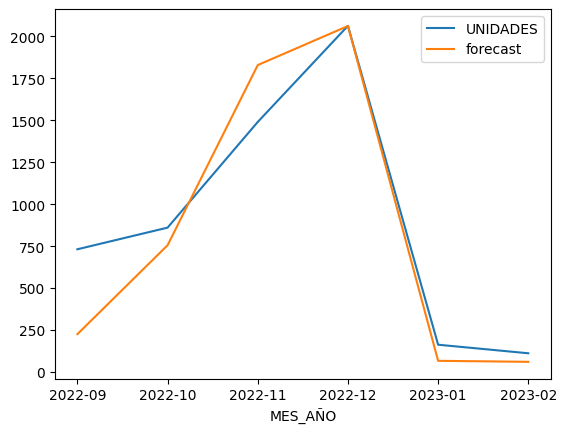

In [ ]:
modelo_pantalon = XGB_model_2022(pantalon)
modelo_pantalon.plot()

## Clasificación

#### Special

In [54]:
df_2018_2023 = df.loc[df['AÑO'] >= 2018]

In [55]:
clasificacion_special = pd.DataFrame()
meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

combinaciones = [(tipo, mundo) for tipo in sorted(df_2018_2023["Tipo de Artículo"].unique().tolist()) \
                               for mundo in sorted(df_2018_2023["Mundo"].unique().tolist())]

# MUNDO NIÑO 
for (tipo,mundo) in combinaciones:
    # FILTRO DATOS 
    portafolio_aux = DATA_preparation_2022(mundo, tipo, df_2018_2023)
    
    # Calcular el factor CV para cada mes
    cv_mes = {}
    for mes in meses:
        if mes in portafolio_aux['MES'].unique():
            cv_mes[mes] = round(portafolio_aux[portafolio_aux['MES'] == mes]['UNIDADES'].std()
                                / portafolio_aux[portafolio_aux['MES'] == mes]['UNIDADES'].mean(), 2)
        else:
            cv_mes[mes] = np.nan
    
    # Interpolar los valores faltantes
    cv_mes = pd.Series(cv_mes).interpolate(method='linear', limit_area='inside')

    if((len(portafolio_aux) != 0)):
        clasificacion_special = clasificacion_special.append({'MUNDO': mundo,
                                                        'TIPO' : tipo,
                                                        'Datos': len(portafolio_aux),
                                                        'MES 1 CV':  round(cv_mes[1],2),
                                                        'MES 2 CV':  round(cv_mes[2],2),
                                                        # 'MES 3 CV': cv_mes[3],
                                                        # 'MES 4 CV': cv_mes[4],
                                                        # 'MES 5 CV': cv_mes[5],
                                                        # 'MES 6 CV': cv_mes[6],
                                                        # 'MES 7 CV': cv_mes[7],
                                                        # 'MES 8 CV': cv_mes[8],
                                                        'MES 9 CV':  round(cv_mes[9],2),
                                                        'MES 10 CV': round(cv_mes[10],2),
                                                        'MES 11 CV': round(cv_mes[11],2),
                                                        'MES 12 CV': round(cv_mes[12],2)},
                                                        ignore_index=True)

    else:
        continue

In [56]:
capacidad_filtro = [col for col in clasificacion_special if col.startswith('MES')]
clasificacion_special['CV promedio'] = round(clasificacion_special[capacidad_filtro].mean(axis=1),2)
clasificacion_special.loc[clasificacion_special.iloc[:, 4:10].isnull().any(axis=1), "CV promedio"] = np.nan

In [57]:
# niño_clasificacion.loc[(niño_clasificacion[''] > 2) & \
#                        (niño_clasificacion[''] <= 3 ), '9 BOX'] = 6 

In [58]:
clasificacion_special[clasificacion_special['MUNDO'] ==
                      'NIÑA'].sort_values(by='CV promedio', ascending=True).head(5)


,MUNDO,TIPO,Datos,MES 1 CV,MES 2 CV,MES 9 CV,MES 10 CV,MES 11 CV,MES 12 CV,CV promedio
90,NIÑA,MINIFALDA,32,0.37,0.42,0.23,0.68,0.49,0.30,0.42
88,NIÑA,MIDI,11,0.47,1.39,0.69,0.59,0.47,0.22,0.64
23,NIÑA,BOTAS,22,0.66,0.89,0.42,0.91,0.63,0.55,0.68
63,NIÑA,CHAQUETA,32,0.60,0.57,0.55,1.19,0.72,0.65,0.71
118,NIÑA,VESTIDO MANGA LARGA,28,0.83,0.71,0.35,1.11,0.82,0.74,0.76


In [59]:
clasificacion_special[clasificacion_special['MUNDO'] == 'NIÑA'].loc[
    clasificacion_special[clasificacion_special['MUNDO'] == 'NIÑA']['TIPO'] == 'MINIFALDA']

,MUNDO,TIPO,Datos,MES 1 CV,MES 2 CV,MES 9 CV,MES 10 CV,MES 11 CV,MES 12 CV,CV promedio
90,NIÑA,MINIFALDA,32,0.37,0.42,0.23,0.68,0.49,0.3,0.42


PRueba sin tomar el año 2020

In [60]:
clasificacion_special_out_2022 = pd.DataFrame()
meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

combinaciones = [(tipo, mundo) for tipo in sorted(df_2018_2023["Tipo de Artículo"].unique().tolist()) \
                               for mundo in sorted(df_2018_2023["Mundo"].unique().tolist())]

# MUNDO NIÑO 
for (tipo,mundo) in combinaciones:
    # FILTRO DATOS 
    # data2 = df_2018_2023.loc[(df_2018_2023['AÑO'] == 2021) | (df_2018_2023['AÑO'] == 2022)]
    data2 = df_2018_2023.loc[(df_2018_2023['AÑO'] >= 2018)]

    portafolio_aux = DATA_preparation_2022(mundo, tipo, data2)
    
    # Calcular el factor CV para cada mes
    cv_mes = {}
    for mes in meses:
        if mes in portafolio_aux['MES'].unique():
            cv_mes[mes] = round(portafolio_aux[portafolio_aux['MES'] == mes]['UNIDADES'].std()
                                / portafolio_aux[portafolio_aux['MES'] == mes]['UNIDADES'].mean(), 2)
        else:
            cv_mes[mes] = np.nan
    

    if((len(portafolio_aux) != 0)):
        clasificacion_special_out_2022 = clasificacion_special_out_2022.append({'MUNDO': mundo,
                                                        'TIPO' : tipo,
                                                        'Datos': len(portafolio_aux),
                                                        'MES 1 CV':  round(cv_mes[1],2),
                                                        'MES 2 CV':  round(cv_mes[2],2),
                                                        # 'MES 3 CV': cv_mes[3],
                                                        # 'MES 4 CV': cv_mes[4],
                                                        # 'MES 5 CV': cv_mes[5],
                                                        # 'MES 6 CV': cv_mes[6],
                                                        # 'MES 7 CV': cv_mes[7],
                                                        # 'MES 8 CV': cv_mes[8],
                                                        'MES 9 CV':  round(cv_mes[9],2),
                                                        'MES 10 CV': round(cv_mes[10],2),
                                                        'MES 11 CV': round(cv_mes[11],2),
                                                        'MES 12 CV': round(cv_mes[12],2)},
                                                        ignore_index=True)

    else:
        continue

capacidad_filtro = [col for col in clasificacion_special_out_2022 if col.startswith('MES')]
clasificacion_special_out_2022['CV promedio'] = round(clasificacion_special_out_2022[capacidad_filtro].mean(axis=1),2)
clasificacion_special_out_2022.loc[clasificacion_special_out_2022.iloc[:, 4:10].isnull().any(axis=1), "CV promedio"] = np.nan

In [61]:
capacidad_filtro = [col for col in niño_clasificacion if col.startswith('MES')]
niño_clasificacion['CV2'] = round((niño_clasificacion[capacidad_filtro].std(axis=1)\
                            /niño_clasificacion[capacidad_filtro].mean(axis=1)),2)

NameError: name 'niño_clasificacion' is not defined

In [ ]:
niño_clasificacion[niño_clasificacion['MUNDO'] == 'NIÑA'].sort_values(by='CV promedio', ascending = True)

,MUNDO,TIPO,Datos,MES 1 CV,MES 2 CV,MES 9 CV,MES 10 CV,MES 11 CV,MES 12 CV,CV promedio,CV2
90,NIÑA,MINIFALDA,32,0.37,0.42,0.23,0.68,0.49,0.30,0.42,0.38
23,NIÑA,BOTAS,22,0.66,0.89,0.42,0.91,0.63,0.55,0.68,0.28
63,NIÑA,CHAQUETA,32,0.60,0.57,0.55,1.19,0.72,0.65,0.71,0.34
118,NIÑA,VESTIDO MANGA LARGA,28,0.83,0.71,0.35,1.11,0.82,0.74,0.76,0.32
103,NIÑA,SANDALIA,26,0.34,0.60,0.70,1.74,0.65,0.63,0.78,0.63
115,NIÑA,VESTIDO MANGA CORTA,32,1.16,0.80,0.79,0.86,0.90,0.91,0.90,0.15
18,NIÑA,BODY MANGA SISA,16,0.88,0.61,1.40,1.04,0.62,1.15,0.95,0.33
5,NIÑA,BALETA,30,0.99,0.76,0.96,1.10,1.20,0.96,1.00,0.15
38,NIÑA,CAMISA MANGA LARGA,28,0.87,0.77,0.81,0.78,1.53,1.29,1.01,0.32
121,NIÑA,VESTIDO MANGA SISA,26,0.61,1.30,1.17,0.92,1.23,0.98,1.04,0.25


In [ ]:
niño_clasificacion[niño_clasificacion['MUNDO'] == 'NIÑA'].sort_values(by='CV promedio', ascending = True)

,MUNDO,TIPO,Datos,MES 1 CV,MES 2 CV,MES 9 CV,MES 10 CV,MES 11 CV,MES 12 CV,CV promedio,CV2
90,NIÑA,MINIFALDA,32,0.37,0.42,0.23,0.68,0.49,0.30,0.42,0.38
23,NIÑA,BOTAS,22,0.66,0.89,0.42,0.91,0.63,0.55,0.68,0.28
63,NIÑA,CHAQUETA,32,0.60,0.57,0.55,1.19,0.72,0.65,0.71,0.34
118,NIÑA,VESTIDO MANGA LARGA,28,0.83,0.71,0.35,1.11,0.82,0.74,0.76,0.32
103,NIÑA,SANDALIA,26,0.34,0.60,0.70,1.74,0.65,0.63,0.78,0.63
115,NIÑA,VESTIDO MANGA CORTA,32,1.16,0.80,0.79,0.86,0.90,0.91,0.90,0.15
18,NIÑA,BODY MANGA SISA,16,0.88,0.61,1.40,1.04,0.62,1.15,0.95,0.33
5,NIÑA,BALETA,30,0.99,0.76,0.96,1.10,1.20,0.96,1.00,0.15
38,NIÑA,CAMISA MANGA LARGA,28,0.87,0.77,0.81,0.78,1.53,1.29,1.01,0.32
121,NIÑA,VESTIDO MANGA SISA,26,0.61,1.30,1.17,0.92,1.23,0.98,1.04,0.25


In [ ]:
niño_clasificacion[niño_clasificacion['MUNDO'] == 'NIÑA'].loc[
    niño_clasificacion[niño_clasificacion['MUNDO'] == 'NIÑA']['TIPO'] == 'CAMISA MANGA CORTA']

,MUNDO,TIPO,Datos,MES 1 CV,MES 2 CV,MES 9 CV,MES 10 CV,MES 11 CV,MES 12 CV,CV promedio,CV2
32,NIÑA,CAMISA MANGA CORTA,17,0.57,0.98,NaN,0.0,1.73,1.39,NaN,0.73


In [ ]:
DATA_preparation_2022('NIÑA', 'CAMISA MANGA CORTA',df_2018_2023).loc[
    DATA_preparation_2022('NIÑA', 'CAMISA MANGA CORTA',df_2018_2023)['MES'] == 9
]

,MES,AÑO,UNIDADES,MES_AÑO
26,9,2022,3.0,2022-09


#### Básicos

In [63]:
df_basicos = df_canal.loc[(df_canal['Concepto Diseño'] == 'BASICOS')]
df_basicos = df_basicos.loc[df_basicos['AÑO'] >= 2018]

In [64]:
basicos_clasificacion = pd.DataFrame()
meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

combinaciones = [(tipo, mundo) for tipo in sorted(df_basicos["Tipo de Artículo"].unique().tolist()) \
                               for mundo in sorted(df_basicos["Mundo"].unique().tolist())]

# MUNDO NIÑO 
for (tipo,mundo) in combinaciones:
    
    # FILTRO DATOS 
    portafolio_aux = DATA_preparation_2022(mundo, tipo, df_basicos)
    
    # Calcular el factor CV para cada mes
    cv_mes = {}
    for mes in meses:
        if mes in portafolio_aux['MES'].unique():
            cv_mes[mes] = round(portafolio_aux[portafolio_aux['MES'] == mes]['UNIDADES'].std()
                                / portafolio_aux[portafolio_aux['MES'] == mes]['UNIDADES'].mean(), 2)
        else:
            cv_mes[mes] = 0
    

    if((len(portafolio_aux) != 0)):
        basicos_clasificacion = basicos_clasificacion.append({'MUNDO': mundo,
                                                        'TIPO' : tipo,
                                                        'Datos': len(portafolio_aux),
                                                        'MES 1 CV':  round(cv_mes[1],2),
                                                        'MES 2 CV':  round(cv_mes[2],2),
                                                        'MES 9 CV':  round(cv_mes[9],2),
                                                        'MES 10 CV': round(cv_mes[10],2),
                                                        'MES 11 CV': round(cv_mes[11],2),
                                                        'MES 12 CV': round(cv_mes[12],2)},
                                                        ignore_index=True)

    else:
        continue

capacidad_filtro = [col for col in basicos_clasificacion if col.startswith('MES')]
basicos_clasificacion['CV promedio'] = round(basicos_clasificacion[capacidad_filtro].mean(axis=1),2)
# basicos_clasificacion.loc[basicos_clasificacion.iloc[:, 4:10].isnull().any(axis=1), "CV promedio"] = np.nan

In [65]:
basicos_filtro = [col for col in basicos_clasificacion if col.startswith('MES')]
basicos_clasificacion['CV2'] = round((basicos_clasificacion[basicos_filtro].std(axis=1)\
                            /basicos_clasificacion[basicos_filtro].mean(axis=1)),2)

In [66]:
# basicos_clasificacion[(basicos_clasificacion['MUNDO'] == 'NIÑA')]\
# .sort_values(by='Datos', ascending = False)
# (basicos_clasificacion['TIPO'] == 'CAMISA MANGA CORTA')

#### XGBOOST

In [67]:
basicos1 = DATA_preparation_2022('NIÑA','MINIFALDA',df_basicos)


BASICOS SIGUIENDO LINEA TEMPORAL

In [68]:
basicos_model_lineal = XGB_model_2022(basicos1)
basicos_model_lineal

,UNIDADES,forecast
MES_AÑO,,
2022-09,121.0,12.0
2022-10,165.0,76.0
2022-11,296.0,81.0
2022-12,685.0,235.0
2023-01,17.0,12.0
2023-02,10.0,12.0


In [69]:
y_test = basicos_model_lineal['UNIDADES']
pred_test = basicos_model_lineal['forecast']

print("R^2      ..............",   round( r2_score(y_test, pred_test),1))
print('RMSE ES   ..............',  round(math.sqrt(MSE(y_test, pred_test)),2))
print('MSE ES   ..............',   round(MSE(y_test, pred_test),2))
print('MAPE ES  ..............',   round(MAPE(y_test, pred_test),2))

R^2      .............. 0.2
RMSE ES   .............. 211.56
MSE ES   .............. 44759.33
MAPE ES  .............. 0.55


BASICOS AGRUPANDO POR MESES

In [70]:
meses_basicos = [1,2,9,10,11,12]
basicos_forecast = {}

basicos_results = pd.DataFrame()

for mes in meses_basicos:
    if mes in basicos1['MES'].unique():
        # basicos_forecast[mes] = XGB_model_2022(basicos1[basicos1['MES'] == mes])
        basicos_results = pd.concat([basicos_results,XGB_model_2022(basicos1[basicos1['MES'] == mes])])
        
    else:
          basicos_forecast[mes] = 0


In [71]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MAE
from sklearn.metrics import r2_score

y_test = basicos_results['UNIDADES']
pred_test = basicos_results['forecast']

print("R^2      ..............",   round( r2_score(y_test, pred_test),1))
print('RMSE ES   ..............',  round(math.sqrt(MSE(y_test, pred_test)),2))
print('MSE ES   ..............',   round(MSE(y_test, pred_test),2))
print('MAPE ES  ..............',   round(MAPE(y_test, pred_test),2))

R^2      .............. 0.8
RMSE ES   .............. 91.28
MSE ES   .............. 8331.33
MAPE ES  .............. 0.25


In [72]:
basicos_results.sort_index()

,UNIDADES,forecast
MES_AÑO,,
2022-09,121.0,86.0
2022-10,165.0,111.0
2022-11,296.0,162.0
2022-12,685.0,518.0
2023-01,17.0,18.0
2023-02,10.0,11.0


<AxesSubplot: xlabel='MES_AÑO'>

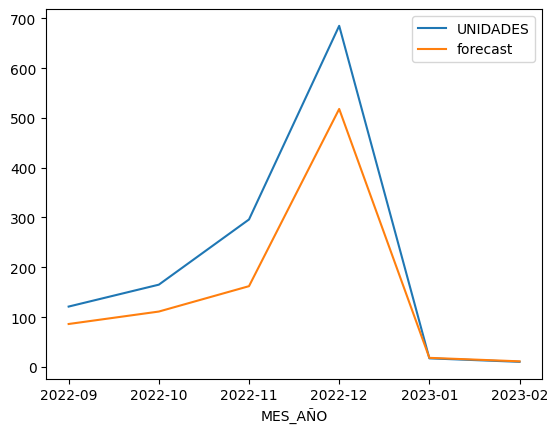

In [73]:
basicos_results.sort_index().plot()

#### PROPHET

In [74]:
# PROPHET_model(basicos1)
def PROHPHET_model_2022(df):
    
    dfProphet = df[['MES_AÑO', 'UNIDADES']].rename(columns={'MES_AÑO': 'ds', 'UNIDADES': 'y'})

    # COVID 2020
    dfProphet['covid'] = [1 if ((x > pd.Timestamp(
        '2020-03')) & (x < pd.Timestamp('2021-03'))) else 0 for x in pd.to_datetime(dfProphet['ds'])]

    train = dfProphet.loc[dfProphet['ds'] <= '2022-08']
    test = dfProphet.loc[(dfProphet['ds'] >= '2022-09') & (dfProphet['ds'] <= '2023-02')]

    m = Prophet()
    # m.add_regressor('covid')
    m.fit(train)

    # # make the forecast
    # forecast = m.predict(test[['ds', 'covid']])
    forecast = m.predict(test)
    forecast[['ds','yhat']]

    forecast['ds'] = pd.to_datetime(forecast['ds']).dt.strftime('%Y-%m')

    test = test.merge(forecast[['ds','yhat']], how='left',on='ds')[['ds','y','yhat']]

    return test

In [75]:
PROHPHET_model_2022(basicos1)

11:38:39 - cmdstanpy - INFO - Chain [1] start processing
11:38:39 - cmdstanpy - INFO - Chain [1] done processing


,ds,y,yhat
0,2022-09,121.0,74.328533
1,2022-10,165.0,75.129653
2,2022-11,296.0,76.835400
3,2022-12,685.0,206.386820
4,2023-01,17.0,-13.736339
5,2023-02,10.0,-39.781218


#### HOLT WINTERS

In [76]:
def HOLT_WINTERS_model_2022(df):
    # HOLT WINTERS - DS
    df_model2 = df[['MES_AÑO', 'UNIDADES']]

    y_train = df_model2.loc[pd.to_datetime(df_model2['MES_AÑO']) <= '2022-08'].set_index('MES_AÑO')
    y_test = df_model2.loc[(pd.to_datetime(df_model2['MES_AÑO']) >= '2022-09') & 
                            (pd.to_datetime(df_model2['MES_AÑO']) <= '2023-02')].set_index('MES_AÑO')

    config = {"seasonal_periods":5,
                        #"trend":"add",
                        "seasonal":"add",
                        #"damped_trend":True,
                        #"use_boxcox":True,
                        #"initialization_method":"estimated"
                        "initialization_method":"estimated"}

    stlf_es_5_sintetico = STLForecast(y_train, 
                                ExponentialSmoothing, 
                                model_kwargs = config,
                                period = 12, 
                                robust=True, seasonal_deg=0, trend_deg=0, low_pass_deg=0)

    stlf_res_es_5_sintetico = stlf_es_5_sintetico.fit()
    forecast_es_5_sintetico = stlf_res_es_5_sintetico.forecast(len(y_test))
    y_test['forecast'] = np.ceil(forecast_es_5_sintetico.values)
   
    # df_hotl_winters_ds = pd.concat([y_train, y_test])

    return y_test

In [77]:
HOLT_WINTERS_model_2022(basicos1)

,UNIDADES,forecast
MES_AÑO,,
2022-09,121.0,322.0
2022-10,165.0,491.0
2022-11,296.0,667.0
2022-12,685.0,1074.0
2023-01,17.0,72.0
2023-02,10.0,3.0


In [78]:
Ñ

NameError: name 'Ñ' is not defined

Método VARIANZA(SUM(Y/mean(y)))

In [ ]:
gio_metodo = DATA_preparation_2022('NIÑA', 'ARETAS',df_2018_2023)
gio_metodo

,MES,AÑO,UNIDADES,MES_AÑO
0,2,2019,1.0,2019-02
7,9,2019,26.0,2019-09
8,10,2019,20.0,2019-10
9,11,2019,14.0,2019-11
10,12,2019,23.0,2019-12
11,1,2020,8.0,2020-01
12,2,2020,1.0,2020-02
13,10,2020,1.0,2020-10


In [ ]:
total_ventas_por_mes = gio_metodo.groupby(['MES']).sum()['UNIDADES']
gio_metodo['UNIDADES_NORMALIZADAS'] = round(gio_metodo.apply(lambda x: x['UNIDADES'] / total_ventas_por_mes[x['MES']], axis=1),2)

In [ ]:
gio_metodo

,MES,AÑO,UNIDADES,MES_AÑO,UNIDADES_NORMALIZADAS
0,2,2019,1.0,2019-02,50.0
7,9,2019,26.0,2019-09,100.0
8,10,2019,20.0,2019-10,95.0
9,11,2019,14.0,2019-11,100.0
10,12,2019,23.0,2019-12,100.0
11,1,2020,8.0,2020-01,100.0
12,2,2020,1.0,2020-02,50.0
13,10,2020,1.0,2020-10,5.0


In [ ]:
gio_metodo.groupby(['MES']).var()[['UNIDADES_NORMALIZADAS']]

,UNIDADES_NORMALIZADAS
MES,
1,NaN
2,0.000
9,NaN
10,0.405
11,NaN
12,NaN


In [ ]:
# total_unidades = pantalon['UNIDADES'].sum()
# pantalon['porcentaje_venta_mes'] = round(100*(pantalon['UNIDADES']/total_unidades),2)
# variance = pantalon['porcentaje_venta_mes'].var()
# variance
# Calculate the sample variance of each column in the DataFrame

In [ ]:
ñ

NameError: name 'ñ' is not defined

# .

## PRUEBAS INICIALES PORTAFOLIOS

### PRUEBA 1 - UN AÑO DE PORTAFOLIO

In [ ]:
# VENTA DE UNA SOLA COLECCION
prueba1 = df.loc[df["Mundo"] == "BEBÉ NIÑA"]
prueba1 = prueba1.loc[prueba1["Tipo de Artículo"] == 'BODY MANGA CORTA']

# prueba1 = df.loc[df["Mundo"] == "BEBÉ NIÑA"]
# prueba1 = prueba1.loc[prueba1["Tipo de Artículo"] == 'CAMISA MANGA SISA']

# PRIMI NIÑO	PUÑO DOBLADO
# prueba1 = df.loc[df["Mundo"] == "PRIMI NIÑO"]
# prueba1 = prueba1.loc[prueba1["Tipo de Artículo"] == 'PUÑO DOBLADO']

df_modelo1 = prueba1.groupby(['Año de Venta', 'Mes de Venta', 'MES', 'AÑO'])[
    'UNIDADES'].sum().to_frame().sort_values(by=['AÑO', 'MES']).reset_index()
df_modelo1

: 

In [ ]:
# VENTA DE UNA SOLA COLECCION
prueba1 = df.loc[df["Mundo"] == "PRIMI NIÑO"]
prueba1 = prueba1.loc[prueba1["Tipo de Artículo"] == 'SET']

# prueba1 = df.loc[df["Mundo"] == "BEBÉ NIÑA"]
# prueba1 = prueba1.loc[prueba1["Tipo de Artículo"] == 'CAMISA MANGA SISA']

# PRIMI NIÑO	PUÑO DOBLADO
# prueba1 = df.loc[df["Mundo"] == "PRIMI NIÑO"]
# prueba1 = prueba1.loc[prueba1["Tipo de Artículo"] == 'PUÑO DOBLADO']

df_modelo1 = prueba1.groupby(['Año de Venta', 'Mes de Venta', 'MES', 'AÑO'])[
    'UNIDADES'].sum().to_frame().sort_values(by=['AÑO', 'MES']).reset_index()
df_modelo1

: 

In [ ]:
df_model2 = pd.concat([df_modelo1.iloc[:5, :],
            df_modelo1.iloc[:5, :].replace({'Año de Venta':{2016: 2017}, 'AÑO':{2016: 2017, 2017:2018}}),
            df_modelo1.iloc[:5, :].replace({'Año de Venta':{2016: 2018}, 'AÑO':{2016: 2018, 2017:2019}}),
            df_modelo1.iloc[:5, :].replace({'Año de Venta':{2016: 2019}, 'AÑO':{2016: 2019, 2017:2020}}),
            df_modelo1.iloc[:5, :].replace({'Año de Venta':{2016: 2020}, 'AÑO':{2016: 2020, 2017:2021}}),
            df_modelo1.iloc[:5, :].replace({'Año de Venta':{2016: 2021}, 'AÑO':{2016: 2021, 2017:2022}}),
            df_modelo1.iloc[:5, :].replace({'Año de Venta':{2016: 2022}, 'AÑO':{2016: 2022, 2017:2023}}),
            df_modelo1.iloc[:5, :].replace({'Año de Venta':{2016: 2023}, 'AÑO':{2016: 2023, 2017:2024}})
            ], axis=0, ignore_index=True)



: 

In [ ]:
df_model2['MES_AÑO'] = pd.to_datetime(df_model2['AÑO'].astype(str) + '-' + df_model2['MES'].astype(str))
df_model2['UNIDADES'].iloc[-5:] = 0
df_model2

: 

#### Modelo

In [ ]:
y_train = df_model2.loc[df_model2['Año de Venta'] <2023][['MES_AÑO', 'UNIDADES']].set_index('MES_AÑO')
y_test = df_model2.loc[df_model2['Año de Venta'] == 2023][['MES_AÑO', 'UNIDADES']].set_index('MES_AÑO')

: 

In [ ]:
config = {"seasonal_periods":12,
                        #"trend":"add",
                        "seasonal":"add",
                        #"damped_trend":True,
                        #"use_boxcox":True,
                        #"initialization_method":"estimated"
                        "initialization_method":"estimated"}

stlf_es_5_sintetico = STLForecast(y_train, 
                                ExponentialSmoothing, 
                                model_kwargs = config,
                                period=12, 
                                robust=True, seasonal_deg=0, trend_deg=0, low_pass_deg=0)

stlf_res_es_5_sintetico = stlf_es_5_sintetico.fit()
forecast_es_5_sintetico = stlf_res_es_5_sintetico.forecast(5)
y_test['UNIDADES'] = np.ceil(forecast_es_5_sintetico.values)
# y_test_5_sintetico = forecast_es_5_sintetico.values

: 

In [ ]:
hw_prueba1  = pd.concat([y_train, y_test]).reset_index()
hw_prueba1['MES_AÑO'] = hw_prueba1['MES_AÑO'].dt.strftime('%Y-%m')


: 

In [ ]:
hw_prueba1.loc[pd.to_datetime(hw_prueba1['MES_AÑO']).dt.month == 3]

: 

In [ ]:
pd.concat([y_train,y_test]).plot()

: 

#### prophet

In [ ]:
dfProphet = df_model2[['MES_AÑO', 'UNIDADES']].rename(columns={'MES_AÑO': 'ds', 'UNIDADES': 'y'})
train = dfProphet.loc[dfProphet['ds'] <= '2023-3']
test = dfProphet.loc[dfProphet['ds'] > '2023-3']

: 

In [ ]:
m = Prophet()
m.fit(train)

# make the forecast
forecast = m.predict(test)
forecast[['ds','yhat']]

: 

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

# ax.scatter(forecast.ds, forecast['y'], color='r')
fig = m.plot(forecast, ax=ax)

: 

### PRUEBA 2 - 7 AÑOS DE PORTAFOLIO

In [ ]:
# BEBÉ NIÑO	CAMISA MANGA LARGA
prueba2 = df.loc[df["Mundo"] == "BEBÉ NIÑO"]
prueba2 = prueba2.loc[prueba2["Tipo de Artículo"] == 'CAMISA MANGA LARGA']

# AGRUPANDO DATOS
df_modelo_2 = prueba2.groupby(['Año de Venta', 'Mes de Venta', 'MES', 'AÑO'])[
    'UNIDADES'].sum().to_frame().sort_values(by=['AÑO', 'MES']).reset_index()

# FILTRAR MESES DE INTERES
df_modelo_2 = df_modelo_2.loc[(df_modelo_2['MES'] > 10) | (df_modelo_2['MES'] <= 3)]

# AGREGAR COLUMNAS PRONOSTICO
df_modelo_2 = pd.concat([df_modelo_2,
            df_modelo_2.iloc[:5, :].replace({'Año de Venta':{2016: 2023}, 'AÑO':{2016: 2023, 2017:2024}})
            ], axis=0, ignore_index=True)

# CREAR COLUMNA AÑO Y MES SEGUN MES Y AÑO DE VENTA
df_modelo_2['MES_AÑO'] = pd.to_datetime(df_modelo_2['AÑO'].astype(str) + '-' + df_modelo_2['MES'].astype(str)).dt.strftime('%Y-%m')
df_modelo_2['UNIDADES'].iloc[-5:] = 0
df_modelo_2.head()

: 

In [ ]:
df_modelo_2.loc[pd.to_datetime(df_modelo_2['MES_AÑO']).dt.month == 3][['MES_AÑO', 'UNIDADES']]

: 

#### HOLT WINTERS WITH SD

In [ ]:
# DATOS SINTETICOS
y_train_covid = df_modelo_2.loc[df_modelo_2['MES_AÑO'] <= '2020-02'][['MES_AÑO','UNIDADES']].set_index('MES_AÑO')
y_test_covid = df_modelo_2.loc[(df_modelo_2['MES_AÑO'] >= '2020-03') & 
                                (df_modelo_2['MES_AÑO'] <= '2020-12')][['MES_AÑO','UNIDADES']].set_index('MES_AÑO')

config_5 = {"seasonal_periods": 5,
            # "trend":"add",
            "seasonal":"add",
            "initialization_method":'estimated'
    }

stlf_es_5 = STLForecast(y_train_covid,
                        ExponentialSmoothing, 
                        model_kwargs = config_5, 
                        period = 5, 
                        robust=True, 
                        seasonal_deg=0, trend_deg=0, low_pass_deg=0,
                        )

stlf_result = stlf_es_5.fit()
forecast_es = stlf_result.forecast(len(y_test_covid))
y_test_covid["STL_HOLT WINTER (ADD SEASONAL)"] = np.ceil(forecast_es.values)
# forecast_es.index = y_test.index
y_test_covid


: 

In [ ]:
# Train :febreo 2020
train2 = pd.concat([y_train_covid,
         y_test_covid.drop(columns=['UNIDADES'],axis=1).rename(
            columns={'STL_HOLT WINTER (ADD SEASONAL)':'UNIDADES'}),
         df_modelo_2.loc[(df_modelo_2['MES_AÑO'] > '2020-12') & 
                          (df_modelo_2['MES_AÑO'] <='2023-03')][['MES_AÑO', 'UNIDADES']].set_index('MES_AÑO')
            ])
                                            
test2 = df_modelo_2.loc[df_modelo_2.MES_AÑO >='2023-04'][['MES_AÑO', 'UNIDADES']].set_index('MES_AÑO')

ES = ExponentialSmoothing
        
configES = {#'trend': 'add',
        'seasonal' :"add",
        'seasonal_periods': 12,
        "initialization_method":"estimated"
        }

stlf = STLForecast(train2, 
                    ES,
                    model_kwargs = configES,
                    period = 12,
                    robust = True,
                    seasonal_deg = 0, trend_deg = 0, low_pass_deg = 0
                    )

stlf_res = stlf.fit()
forecast = stlf_res.forecast(len(test2))
forecast.index = test2.index
test2['UNIDADES'] = np.ceil(forecast)

: 

In [ ]:
hw_sintetic = pd.concat([train2, test2]).reset_index()

: 

In [ ]:
print(hw_sintetic.loc[pd.to_datetime(hw_sintetic['MES_AÑO']).dt.month == 3].mean())
hw_sintetic.loc[pd.to_datetime(hw_sintetic['MES_AÑO']).dt.month == 3]

: 

In [ ]:
ñ

: 

#### HOLT WINTERS

In [ ]:
# MODELO 1
y_train = df_modelo_2.loc[df_modelo_2['Año de Venta'] < 2023][['MES_AÑO', 'UNIDADES']].set_index('MES_AÑO')
y_test = df_modelo_2.loc[df_modelo_2['Año de Venta'] == 2023][['MES_AÑO', 'UNIDADES']].set_index('MES_AÑO')

config = {"seasonal_periods": 12,
            #"trend":"add",
            "seasonal":"add",
            "initialization_method":"estimated"}

stlf_es_5_sintetico = STLForecast(y_train, 
                                ExponentialSmoothing, 
                                model_kwargs = config,
                                period = 12, 
                                robust=True, seasonal_deg=0, trend_deg=0, low_pass_deg=0)

stlf_res_es_5_sintetico = stlf_es_5_sintetico.fit()
forecast_es_5_sintetico = stlf_res_es_5_sintetico.forecast(5)
y_test['UNIDADES'] = forecast_es_5_sintetico.values

: 

In [ ]:
df_holt_winters = pd.concat([y_train, y_test]).reset_index()

: 

In [ ]:
df_holt_winters.loc[pd.to_datetime(df_holt_winters['MES_AÑO']).dt.month == 3]

: 

In [ ]:
df_holt_winters.loc[pd.to_datetime(df_holt_winters['MES_AÑO']).dt.month == 3]['UNIDADES'].mean()

: 

In [ ]:
pd.concat([y_train,y_test]).plot()

: 

In [ ]:
# ñ

: 

#### PROPHET

In [ ]:
def PROPHET_model(df):
    dfProphet = df[['MES_AÑO', 'UNIDADES']].rename(columns={'MES_AÑO': 'ds', 'UNIDADES': 'y'})
   
   # COVID 2020
    dfProphet['covid'] = [1 if ((x > pd.Timestamp(
        '2020-03')) & (x < pd.Timestamp('2021-03'))) else 0 for x in pd.to_datetime(dfProphet['ds'])]

    dfProphet['floor'] = 0
    dfProphet['cap'] = dfProphet.y.max()

    train = dfProphet.loc[dfProphet['ds'] <= '2023-03']
    test = dfProphet.loc[dfProphet['ds'] > '2023-03']

    m = Prophet(growth='logistic')
    m.add_regressor('covid')
    m.fit(train)

    # make the forecast
    forecast = m.predict(test[['ds', 'covid', 'floor','cap']])
    forecast[['ds','yhat']]
    
    forecast['ds'] = pd.to_datetime(forecast['ds']).dt.strftime('%Y-%m')
    
    test = test.merge(forecast[['ds','yhat']], how='left',on='ds')[['ds','yhat']]

    df_prophet = pd.concat([train[['ds','y']],
                            test.rename(columns={'yhat':'y'})])
    
    return df_prophet


: 

In [ ]:
# MODELO 2
# dfProphet = df_modelo_2[['MES_AÑO', 'UNIDADES']].rename(columns={'MES_AÑO': 'ds', 'UNIDADES': 'y'})
# dfProphet['covid'] = [1 if ((x > pd.Timestamp(
#     '2020-03')) & (x < pd.Timestamp('2021-03'))) else 0 for x in pd.to_datetime(dfProphet['ds'])]

# dfProphet['floor'] = 0
# dfProphet['cap'] = dfProphet.y.max()

# train = dfProphet.loc[dfProphet['ds'] <= '2023-03']
# test = dfProphet.loc[dfProphet['ds'] > '2023-03']


# m = Prophet(growth='logistic')
# m.add_regressor('covid')
# m.fit(train)

# # make the forecast
# forecast = m.predict(test[['ds', 'covid', 'floor','cap']])
# forecast[['ds','yhat']]


: 

In [ ]:
# PRUEBA FUNCION PROPHET
prophet_prueba = PROPHET_model(df_modelo_2)
prophet_prueba

: 

In [ ]:
# h

: 

#### XGBOOST

In [ ]:
def create_features(df, label=None):
    df['date'] = pd.to_datetime(df.index)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    df['covid'] = [1 if ((x > pd.Timestamp('2020-03')) & (x < pd.Timestamp('2021-03'))) else 0 for x in df.date]
    
    X = df[['quarter','month','year',
           'dayofyear','weekofyear','covid']]

    
    if label:
        y = df[label]
        return X, y
    return X

: 

In [ ]:
def XGB_model(df):
    df_model = df[['MES_AÑO', 'UNIDADES']]

    #  TRAIN & TEST
    train = df_model.loc[df_model.MES_AÑO <='2023-03'].set_index('MES_AÑO')
    test = df_model.loc[(df_model.MES_AÑO >='2023-04')].set_index('MES_AÑO')

    # Define el train y test de acuerdo con las bases de datos de train y de test
    X_train, y_train = create_features(train, label = 'UNIDADES')
    X_test, y_test = create_features(test, label = 'UNIDADES')

    xgbr = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=100,subsample=0.8)

    # Set the parameters by cross-validation
    tuned_parameters = {
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'base_score': [0.1, 0.3, 0.5],
        'eval_metric': ['rmse', 'mae', 'mape']
    }

    clf = GridSearchCV(xgbr, param_grid = tuned_parameters, cv = 5)
    clf.fit(X_train, y_train)

    # print("Best parameters set found on development set:")
    # print( clf.best_params_)
    # print("Best score found on development set:")
    # print( clf.best_score_)

    pred_test = clf.predict(X_test)
    test['UNIDADES'] = np.ceil(pred_test)

    df_xgb = pd.concat([train['UNIDADES'].to_frame(),
                   test['UNIDADES'].to_frame()]).reset_index()
    
    return df_xgb

: 

In [ ]:
# prueba_xgb = XGB_model(df_modelo_2)

: 

In [ ]:
# calculate the mean and standard deviation of the forecast samples
forecast_mean = np.round(prueba_xgb['UNIDADES'].mean(axis=0),3)
forecast_std = np.round(np.std(prueba_xgb['UNIDADES'], axis=0),3)
lower_bound = forecast_mean - 1.96 * forecast_std
upper_bound = forecast_mean + 1.96 * forecast_std

print(lower_bound,upper_bound)
print(forecast_mean, forecast_std)

: 

In [ ]:
fig = px.line(prueba_xgb, x= 'MES_AÑO', y = 'UNIDADES')
fig.show()

: 

### PRUEBA 3 CON OTRO EJEMPLO 7 AÑOS DE PORTAFOLIO

In [ ]:
prueba3 = DATA_preparation("BEBÉ NIÑO",'CAMISA MANGA LARGA')
prueba3

: 

In [ ]:
prueba3_modelo = XGB_model(prueba3)

: 

In [ ]:
prueba3_modelo

: 

In [ ]:
print(prueba3_modelo.loc[pd.to_datetime(prueba3_modelo['MES_AÑO']).dt.month == 3].mean())
prueba3_modelo.loc[pd.to_datetime(prueba3_modelo['MES_AÑO']).dt.month == 3]

: 

In [ ]:
prueba3_modelo.loc[(pd.to_datetime(prueba3_modelo['MES_AÑO']).dt.month == 11)
                    & (pd.to_datetime(prueba3_modelo['MES_AÑO']).dt.year == 2023)]

: 

In [ ]:
fig = px.line(prueba3_modelo, x= 'MES_AÑO', y = 'UNIDADES')
fig.show()

: 

: 

### PRUEBA 4. UN AÑO DE PORTAFOLIO

In [ ]:
# NIÑO	ZAPATOS COSIDOS
prueba4 = DATA_preparation("NIÑO",'ZAPATOS COSIDOS')
prueba4 = prueba4.replace({'AÑO':{2016: 2023, 2017:2024,2018:2023}})

: 

In [ ]:
prueba4_modelo = XGB_model(prueba4)

: 

In [ ]:
print(prueba4_modelo.loc[pd.to_datetime(prueba4_modelo['MES_AÑO']).dt.month == 12].mean())
prueba4_modelo.loc[pd.to_datetime(prueba4_modelo['MES_AÑO']).dt.month == 12]

: 

In [ ]:
ññ

: 

### PRUEBA 5. EVALUACION CATEGORÍAS CON 7 AÑOS DE PORTAFOLIO

### MODELO XGB SIN DS

In [ ]:
total = pd.DataFrame({'MES_AÑO':[], 'UNIDADES':[], 'TIPO':[], 'MUNDO': []})
total

: 

In [ ]:
for mundo in sorted(df["Mundo"].unique().tolist()):
    for tipo in sorted(df["Tipo de Artículo"].unique().tolist()):
        # FILTRO DATOS 
        
        portafolio_aux = DATA_preparation(mundo, tipo)
        # SON 7 AÑOS MAS EL DE PRONOSTICO
        if((len(portafolio_aux) != 0) & (portafolio_aux['Año de Venta'].nunique() == 7)):
            # print(i,j, len(portafolio_aux),portafolio_aux['Año de Venta'].nunique(), '\n')
            xgb_aux = XGB_model(portafolio_aux)
            xgb_aux['TIPO'] = tipo
            xgb_aux['MUNDO'] = mundo
            xgb_aux['MODELO'] = 'XGB'

            # datos sinteticos
            xgb_aux_2 = XGB_MODEL_SINTETIC(portafolio_aux)
            xgb_aux_2['TIPO'] = tipo
            xgb_aux_2['MUNDO'] = mundo
            xgb_aux_2['MODELO'] = 'XGB DS'

            # PROPEHT
            prophet_aux = PROPHET_model(portafolio_aux)
            prophet_aux['TIPO'] = tipo
            prophet_aux['MUNDO'] = mundo
            prophet_aux['MODELO'] = 'PROPHET'
            
            holtW_aux = HOLT_WINTERS_model(portafolio_aux)
            holtW_aux['TIPO'] = tipo
            holtW_aux['MUNDO'] = mundo
            holtW_aux['MODELO'] = 'HOLT WINTERS'
            

            total = pd.concat([total,xgb_aux, xgb_aux_2, prophet_aux, holtW_aux])
        else:
            continue
        

: 

In [ ]:
prueba7_years_excel = total[['MODELO','MUNDO','TIPO','MES_AÑO','UNIDADES']]
prueba7_years_excel.to_excel('resultados_7_years.xlsx')

: 

In [ ]:
prueba7_years_excel

: 

In [ ]:
l

: 

### PRUEBA 5. DATOS SINTETICOS

In [ ]:
total_sint = pd.DataFrame({'MES_AÑO':[], 'UNIDADES':[], 'TIPO':[], 'MUNDO': []})

: 

In [ ]:
for mundo in sorted(df["Mundo"].unique().tolist()):
    for tipo in sorted(df["Tipo de Artículo"].unique().tolist()):
        # FILTRO DATOS 
        
        portafolio_aux = DATA_preparation(mundo, tipo)
        # SON 7 AÑOS MAS EL DE PRONOSTICO
        if((len(portafolio_aux) != 0) & (portafolio_aux['Año de Venta'].nunique() >= 6)):
            # print(i,j, len(portafolio_aux),portafolio_aux['Año de Venta'].nunique(), '\n')
            xgb_aux = XGB_MODEL_SINTETIC(portafolio_aux)
            xgb_aux['TIPO'] = tipo
            xgb_aux['MUNDO'] = mundo

            total_sint = pd.concat([total_sint,xgb_aux])
        else:
            continue
        

: 

In [ ]:
total_sint.shape
prueba7_years_excel_2 = total_sint[['MUNDO','TIPO','MES_AÑO','UNIDADES']]
prueba7_years_excel_2.to_excel('resultados_7_years_2.xlsx')
prueba7_years_excel_2

: 

In [ ]:
prueba5 = DATA_preparation('NIÑO','CAMISA MANGA LARGA')
prueba5

: 

In [ ]:
pd.concat([train2, test2])

: 

In [ ]:
l

: 

## **PRUEBA ESPECIFICA - CORREO**

In [ ]:
clasificacion[['MUNDO', 'TIPO ARTICULO']].loc[clasificacion['TOTAL AÑOS DE VENTA'] == 7]

: 

In [ ]:
mundo =  'NIÑO'
tipo =  'CHAQUETA'

data = DATA_preparation(mundo,tipo) 
# data.head()
forecast_modelo = XGB_MODEL_SINTETIC(data)
# forecast_modelo.tail()
envio_correo(forecast_modelo,mundo, tipo,'victor.guisao@offcorss.com,helena.munoz@offcorss.com')


: 

In [ ]:
# envio_correo(forecast_modelo,
#              mundo,
#               tipo,
#               'victor.guisao@offcorss.com,miguel.robayo@offcorss.com,giovanni.lopez@offcorss.com,jairo.torres@offcorss.com,santiago.rivillas@offcorss.com,helena.munoz@offcorss.com')


: 

In [ ]:
mundo_2 =  'NIÑO'
tipo_2 =  'CAMISA MANGA LARGA'

data2 = DATA_preparation(mundo = mundo_2,tipo = tipo_2)
data2['Mes de Venta NUMERO'] =  data2['Mes de Venta'].apply(get_month_number)
forecast_modelo2 = XGB_model(data2)
envio_correo(forecast_modelo2,mundo_2, tipo_2,'helena.munoz@offcorss.com')

: 

In [ ]:
mundo_3 =  'NIÑO'
tipo_3 =  'PANTALON'

data3 = DATA_preparation(mundo = mundo_3,tipo = tipo_3)
forecast_modelo3 = XGB_MODEL_SINTETIC(data3)
envio_correo(forecast_modelo3,mundo_3, tipo_3,'helena.munoz@offcorss.com')

: 

In [ ]:
'''victor.guisao@offcorss.com,
miguel.robayo@offcorss.com,
giovanni.lopez@offcorss.com,
jairo.torres@offcorss.com,
santiago.rivillas@offcorss.com,
marilyn.lopez@offcorss.com,helena.munoz@offcorss.com'''

: 

In [ ]:
envio_correo(forecast_modelo,
            mundo,
            tipo,
            'santiago.rivillas@offcorss.com')

: 